In [1]:
# Print out WSL shell environment vars passed to jupyter notebook
ENV

Base.EnvDict with 29 entries:
  "SHELL"           => "/bin/bash"
  "WSL_DISTRO_NAME" => "Ubuntu"
  "WT_SESSION"      => "0c775e84-5c5b-4957-82a5-8fc3b8d3feeb"
  "NAME"            => "DESKTOP-A1AUCQ6"
  "PWD"             => "/home/kkganko"
  "LOGNAME"         => "kkganko"
  "HOME"            => "/home/kkganko"
  "LANG"            => "C.UTF-8"
  "WSL_INTEROP"     => "/run/WSL/6338_interop"
  "LS_COLORS"       => "rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35…
  "LESSCLOSE"       => "/usr/bin/lesspipe %s %s"
  "PYTHONPATH"      => "/home/kkganko/.julia/conda/3/bin/python"
  "TERM"            => "xterm-256color"
  "LESSOPEN"        => "| /usr/bin/lesspipe %s"
  "USER"            => "kkganko"
  "SHLVL"           => "1"
  "DOCKER_ARCH"     => "amd64"
  "WSLENV"          => "WT_SESSION::WT_PROFILE_ID"
  "XDG_DATA_DIRS"   => "/usr/local/share:/usr/share:/var/lib/snapd/desktop"
  "BROWSER"         => "/mnt/c/Program Files (x86)/Microsoft/Edge/Application/m…
  "PATH"            => "/us

In [2]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.7/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [8f4d0f93] Conda v1.7.0
  [459566f4] DiffEqCallbacks v2.26.1
  [7073ff75] IJulia v1.23.3
  [4138dd39] JLD v0.13.2
  [b964fa9f] LaTeXStrings v1.3.0
  [1dea7af3] OrdinaryDiffEq v6.51.2
  [91a5bcdd] Plots v1.31.7
  [438e738f] PyCall v1.94.1
  [d330b81b] PyPlot v2.11.0
  [731186ca] RecursiveArrayTools v2.38.5
  [276daf66] SpecialFunctions v2.1.7


In [3]:
# Pkg.add("IJulia")
# Pkg.add("Conda")
# Pkg.add("PyCall")
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("JLD") # for loading and saving Julia variables using .jld file format
# Pkg.add("LaTeXStrings") # for using latex math fonts in plots, prepend L to strings, ie. L"5+5"
# Pkg.add("SpecialFunctions") # for getting Beta function and error function + complementary error function values given inputs
# Pkg.add("BenchmarkTools") # for performance tracking, https://github.com/JuliaCI/BenchmarkTools.jl
# Pkg.add("OrdinaryDiffEq") # for just the ODE numerical solvers in DifferentialEquations.jl
# Pkg.add("DiffEqCallbacks") # for saving callback

# post-processing for pkg.add, might need to update packages, see:
# https://stackoverflow.com/questions/57639110/julia-how-to-update-to-the-latest-version-of-a-package-i-e-flux
# Pkg.update("OrdinaryDiffEq") # `using OrdinarryDiffEq` causes LoadError: UndefVarError: AbstractDiffEqLinearOperator not defined
# # afterwards, got ERROR: LoadError: UndefVarError: Size not defined ==> need to reload Julia ipynb

# need to use the packages, i.e., this starts the precompilation and is the most probable failure point
using Printf # for pretty string formatting of variables
using Random # for setting random seeds
using IJulia
using Conda
using PyCall
using Plots
using Plots; pyplot(html_output_format=:png)
using JLD
using LaTeXStrings
using SpecialFunctions
using LinearAlgebra # holds LowerTriangular() matrix generator plus other nifty Linpack routines
using BenchmarkTools
using OrdinaryDiffEq
using DiffEqCallbacks

1×3 Matrix{String}:
 "hi"  "hi"  "hi"

0.07
$5+5$
$\mathrm{My\, \alpha\, including\, a\, variable\, date:\,}07-08-2018$


L"$\textrm{My date is } 07-08-2018$"

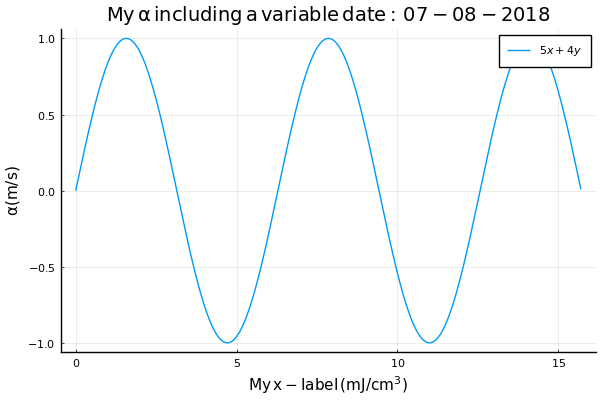

In [4]:
# Test if normal commands are working in this notebook
display("text/plain", ["hi" "hi" "hi"])
Random.seed!(1) # set random seed for runs going forward
testtest = rand() # should be reproducible random number at this point
actual_label = "$(@sprintf("%.2f", testtest))" # pretty formatting
println(actual_label)

# Test if Latex is working fine, can either prepend L to strings or use latexstring function (PREFERRED).
# NOT WORKING IN GR()! See more discussion about issues with gr() backend at 
# https://discourse.julialang.org/t/latex-code-for-titles-labels-with-plots-jl/1967/17
println(L"5+5")
date = "07-08-2018"
titlestring = latexstring("\\mathrm{My\\, \\alpha\\, including\\, a\\, variable\\, date:\\,}", date)
println(titlestring)
display(L"\textrm{My date is } %$(date)")
plot(sin, (0:0.01:5*pi), title = titlestring, xlabel = L"\mathrm{My\, x-label\, (mJ/cm^{3})}", 
    ylabel = L"\mathrm{\alpha (m/s)}", label = latexstring("5x+4y"))

In [5]:
# # need to set to empty string to force Julia installation to use own mini Python distribution
# ENV["PYTHON"]=""
# ENV
# Pkg.build("PyCall")
println("Conda.jl takes packages from $(Conda.ROOTENV)")
println("PyCall uses python at $(Conda.PYTHONDIR)")
println("More precisely PyCall runs using packages at $(PyCall.pyprogramname)")
# list packages the Conda.jl installed
Conda.list(Conda.ROOTENV)

Conda.jl takes packages from /home/kkganko/.julia/conda/3
PyCall uses python at /home/kkganko/.julia/conda/3/bin
More precisely PyCall runs using packages at /home/kkganko/.julia/conda/3/bin/python


┌ Info: Running `conda list` in root environment
└ @ Conda /home/kkganko/.julia/packages/Conda/x2UxR/src/Conda.jl:127


# packages in environment at /home/kkganko/.julia/conda/3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     3.6.1              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39hb9d737c_2    conda-forge
asttokens                 2.0.8              pyhd8ed1ab_0    conda-forge
attrs                     22.1.0             pyh71513ae_1    conda-forge
babel                     2.10.3             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.11.1             pyha770c72_0    cond

In [6]:
# Initially got error that some version `GLIBCXX_3.4.30` not found
# https://stackoverflow.com/questions/44773296/libstdc-so-6-version-glibcxx-3-4-20-not-found
# https://github.com/JuliaPy/PyCall.jl/issues/999
# https://github.com/JuliaPy/PyPlot.jl/issues/469
py"""
from clawpack.pyclaw import examples
claw = examples.acoustics_1d.setup()
claw.run()
# print(type(claw))
# print(type(claw.setplot))
# help(claw.plot)
# print(claw.frames[0].q)
print(claw) # looks at __str__ definition
"""

2023-05-27 22:17:40,887 INFO CLAW: Solution 0 computed for time t=0.000000
2023-05-27 22:17:40,890 INFO CLAW: Solution 1 computed for time t=0.100000
2023-05-27 22:17:40,893 INFO CLAW: Solution 2 computed for time t=0.200000
2023-05-27 22:17:40,896 INFO CLAW: Solution 3 computed for time t=0.300000
2023-05-27 22:17:40,899 INFO CLAW: Solution 4 computed for time t=0.400000
2023-05-27 22:17:40,902 INFO CLAW: Solution 5 computed for time t=0.500000
2023-05-27 22:17:40,905 INFO CLAW: Solution 6 computed for time t=0.600000
2023-05-27 22:17:40,907 INFO CLAW: Solution 7 computed for time t=0.700000
2023-05-27 22:17:40,909 INFO CLAW: Solution 8 computed for time t=0.800000
2023-05-27 22:17:40,911 INFO CLAW: Solution 9 computed for time t=0.900000
2023-05-27 22:17:40,914 INFO CLAW: Solution 10 computed for time t=1.000000
Controller attributes:
  xdir = /home/kkganko/oscillatory_bioreactor 
  rundir = /home/kkganko/oscillatory_bioreactor 
  outdir = ./_output 
  overwrite = True 
  xclawcmd = 

# Define constants and physical meanings

In [7]:
# try implementing general source term
py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

from clawpack import pyclaw
from clawpack import riemann

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters from Table 1 (Cell population model parameters)
γ = 200.0                     # 1/hr, maximum fission rate, when cell m ≥ m_d
A = np.sqrt(25/np.pi)*1.0e11  # 1/g, partition function exponential prefactors (i.e., p(m,m'))
S_l = 0.1                     # g/L, low substrate limit
K_t = 0.01e-11                # g/g/L, proportionality constant for change in transition mass with substrate levels
m_t0 = 6.0e-11                # g, initial transition mass (at low substrate levels)
m_max = 12.0e-11              # g, maximal cell mass allowed
Y = 0.4                       # g/g, yield coefficient for cell mass to mols substrate
K_m = 25.0                    # g/L, Monod constant for single cell growth rate
D = 0.25                      # 1/h, dilution rate in continuous bioreactor operation
ϵ = 5.0e22                    # g^{-2}, inverse variance for fission rate when cells are in fissioning state
β = 100.0e22                  # g^{-2}, another inverse variance for partition function
S_h = 2.0                     # g/L, high substrate limit
K_d = 2.0e-11                 # g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
m_d0 = 11.0e-11               # g, initial critical fissioning mass (at low substrate levels)
m_a = 1.0e-11                 # g, additional mass that mother cell must gain to start fissioning
μ_m = 5.0e-10                 # g/h, single cell growth rate in limit of high substrate levels
α = 20.0                      # 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
S_f = 25.0                    # g/L, feed concentration of substrate to continuous bioreactor

"""

# Parts of the PBM

1. Cell fission rate, $\Gamma(m, S')$
2. Substrates ODE
3. Filtered substrates ODE
4. Changing transition mass with substrate
5. Cell growth rate
4. Cell PBM coupling altogether

Need to build it all in python.

How does a yeast cell progress? From daughter of smallest mass $m_0 > 0$ to mother to budding mother to starting-to-divide budding mother to separation into budding mother and daughter. Two moving status boundaries:

1. transition mass $m_t^*$, when daughter turns into mother and starts growing bud
2. critical mass $m_d^*$, when division intensity is at its highest

There is always a budding portion mass $m_a$ required to start dividing, i.e., when bud is big enough to be cleaved. The moving transition mass and critical mass depend on substrate amount proportion constants $K_t$ and $K_d$, for transition and division respectively, as well as high substrate limiting masses $m_{t0}$ and $m_{d0}$.

# Filtered Substrate-dependent cell transition mass

Cells have larger transition mass when substrate amounts are high (e.g., high resources = less competition for resources = higher time until motherhood), and smaller transition mass when substrate amounts low (e.g., low resources = higher competition for resources = shorter time to motherhood). **Total params = 4**.

$$
m_t^*(S^\prime) = 
\begin{cases} 
m_{t0}+K_t(S_l-S_h) & S^\prime < S_l \\
m_{t0}+K_t(S^\prime-S_h) & S^\prime\in[S_l,S_h] \\
m_{t0} & S^\prime>S_h
\end{cases}
$$

# Filtered Substrate-dependent cell critical mass

Same trends as for cell transition mass, but with larger proportionality concentration $K_d > K_t$ and larger limiting critical mass at high substrate concentration $m_{d0} > m_{t0}$. Cells have larger critical mass when substrate amounts are high (e.g., high resources = less competition for resources = cell division rates slower), and smaller critical mass when substrate amounts are low (e.g., low resources = higher competition for resources = shorter time to divide). **Total params = 2 (in addition to those above)**.

$$
m_d^*(S^\prime) = 
\begin{cases} 
m_{d0}+K_d(S_l-S_h) & S^\prime < S_l \\
m_{d0}+K_d(S^\prime-S_h) & S^\prime\in[S_l,S_h] \\
m_{d0} & S^\prime>S_h
\end{cases}
$$

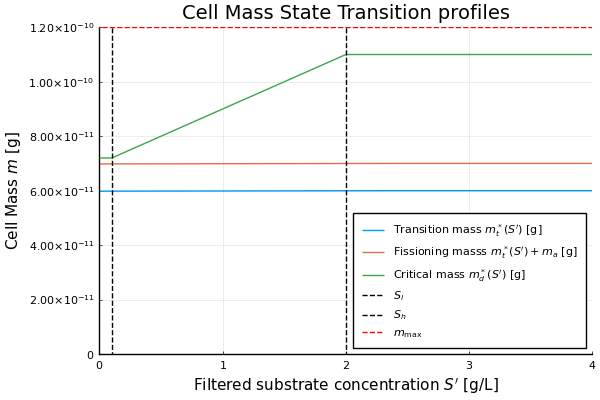

In [8]:
# cell transition and critical mass expression
py"""
# define for both transition mass and critical mass
def m_td(S_prime,m_td0,K_td,S_l,S_h):
    if S_prime < S_l:
        return m_td0 + K_td*(S_l - S_h)
    elif (S_prime > S_l) and (S_prime < S_h):
        return m_td0 + K_td*(S_prime - S_h)
    else:
        return m_td0

N=1000
S_primes = np.linspace(0.0,2*S_h,N)
m_t_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h), S_primes))
m_d_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h), S_primes))
m_ta_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)+m_a, S_primes))
"""
# plotting to see dynamics
masses_p = plot(
    py"S_primes",
    py"m_t_profile",
    xlabel = L"Filtered substrate concentration $S^\prime$ [g/L]",
    ylabel = L"Cell Mass $m$ [g]",
    title = "Cell Mass State Transition profiles",
    label = L"Transition mass $m_t^*(S^\prime)$ [g]",
    legend = :bottomright,
    xlim = (0.0,py"2*S_h"),
    ylim = (0.0,py"m_max")
)

plot!(
    masses_p,
    py"S_primes",
    py"m_ta_profile",
    label = L"Fissioning masss $m_t^*(S^\prime)+m_a$ [g]",
)

plot!(
    masses_p,
    py"S_primes",
    py"m_d_profile",
    label = L"Critical mass $m_d^*(S^\prime)$ [g]",
)

vline!(
    masses_p,
    [py"S_l"],
    label = L"$S_l$",
    linestyle = :dash,
    color = "black"
)

vline!(
    masses_p,
    [py"S_h"],
    label = L"$S_h$",
    linestyle = :dash,
    color = "black"
)

hline!(
    masses_p,
    [py"m_max"],
    label = L"m_{\operatorname{max}}",
    linestyle = :dash,
    color = "red"
)

# Observations: Cell transition mass is much less sensitive to changes in substrate levels than cell critical mass (due to 100$\times$ smaller $K_t$ vs $K_d$)

# Possible Modification: Remove $K_t$ parameter to simplify simulations and increase problem stability 

# Single cell fission rate

Daughter cells ($m\leq m_t^*$) do not fission. Mother cells with buds smaller than the additional mass ($m_d \leq m_d+m_a$) do not fission (i.e., bud is too small to be cleaved). Mother cells with large enough bud start to fission with a Gaussian-type rate, maximizing at the critical mass $m_d^*$. Cells hit maximal mass $m_\textrm{max}$; what happens if they reach this mass? Can assume that they all die, modelled as a Neumann BC.**Total parameters = 4.**

$$
\Gamma(m, S') = 
\begin{cases} 
0 & m\lt m_t^*(S^\prime)+m_a \\
\gamma \operatorname{exp}(-\epsilon(m-m_d^*(S^\prime))^2) & m \in [m_t^*(S^\prime)+m_a, m_d^*(S^\prime)] \\
\gamma & m \in (m_d^*(S^\prime),m_\textrm{max}]
\end{cases}
$$

In [9]:
# need to use lightweight function definitions
py"""
# add function decorator as per 
# https://stackoverflow.com/questions/20228546/how-do-i-apply-some-function-to-a-python-meshgrid
@np.vectorize
def Γ(m,γ,ϵ,m_t,m_d,m_a):
    if m < m_t+m_a:
        return 0.0
    elif (m > m_t+m_a) and (m < m_d):
        return γ*np.exp(-ϵ*(m-m_d)**2)
    else:
        return γ

N=1000
S_primes = np.linspace(0.0,2*S_h,N)
m_list = np.linspace(0.0,m_max,N)
m_t_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h), S_primes))
m_d_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h), S_primes))

# create mesh of masses and indices to reference corresponding pre-calculated m_d,m_t
# compute at each point, O(N^2) ops to get full Γ, less if add logic ignoring zero-valued fission rate
# https://www.geeksforgeeks.org/python-pass-multiple-arguments-to-map-function/#
m_ind_meshed,S_ind_meshed = np.mgrid[0:N,0:N]

# want to use more efficient, numpy-native iterator for map function
# https://numpy.org/doc/stable/reference/generated/numpy.nditer.html#numpy.nditer
Γ_res = map(lambda m_ind,S_ind: Γ(m_list[m_ind],\
γ=γ,ϵ=ϵ,m_t=m_t_profile[S_ind],m_d=m_d_profile[S_ind],m_a=m_a),\
np.nditer(m_ind_meshed),np.nditer(S_ind_meshed))

# convert map object to 1D numpy array
# https://numpy.org/doc/stable/reference/generated/numpy.fromiter.html
Γ_res = np.reshape(np.fromiter(Γ_res,dtype='float64'),(N,N))
"""

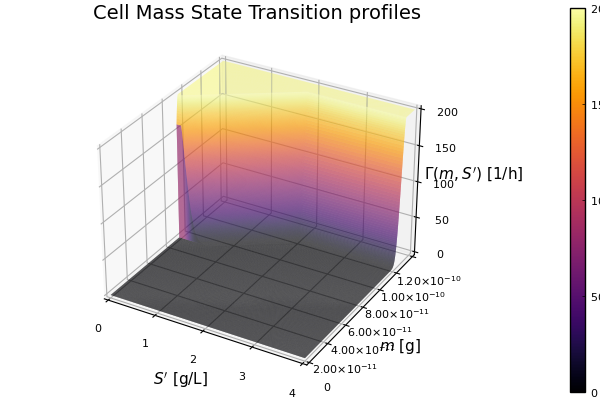

In [10]:
# Γ_res: first index varies m, second index varies S, but Julia switches the two for plotting
# takes a while to produce this plot (N=100 takes seconds, N=1000 takes minutes)
plot(
    py"S_primes",
    py"m_list",
    py"Γ_res",
    st=:surface,
    xlabel = L"$S^\prime$ [g/L]",
    ylabel = L"$m$ [g]",
    zlabel = L"$\Gamma(m,S^\prime)$ [1/h]",
    title = "Cell Mass State Transition profiles"
)

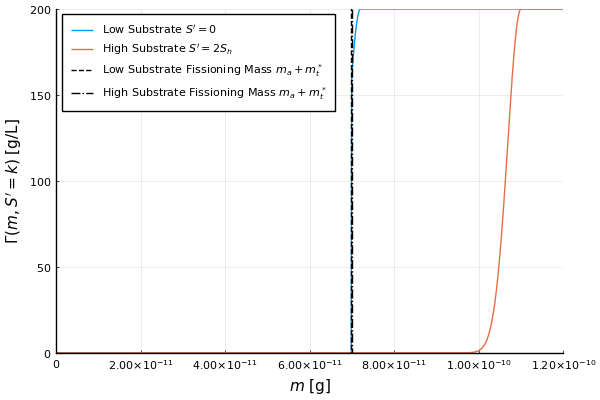

In [11]:
# plot some slices to understand what's going on at low substrate amounts
plot(
    py"m_list",
    py"Γ_res[:,0]",
    label = L"Low Substrate $S^\prime=0$",
    ylabel = L"$\Gamma(m,S^\prime=k)$ [g/L]",
    xlabel = L"$m$ [g]",
    legend = :topleft,
    xlim = (0.0,py"m_max"),
    ylim = (0.0,py"γ")
)

plot!(
    py"m_list",
    py"Γ_res[:,N-1]",
    label = L"High Substrate $S^\prime=2S_h$"
)

vline!(
    [py"m_a+m_t_profile[0]"],
    label = L"Low Substrate Fissioning Mass $m_a+m_t^*$",
    linestyle = :dash,
    color = :black
)

vline!(
    [py"m_a+m_t_profile[N-1]"],
    label = L"High Substrate Fissioning Mass $m_a+m_t^*$",
    linestyle = :dashdot,
    color = :black
)

# Observations: At low substrate amounts, there is a very sharp jump in fission rate due to truncated Gaussian; this may be destabilizing to the FVM numerical solver if discretization is not fine enough

# Possible Modification: Decrease $m_a$

# Observation: Lots of sparsity in the fission rate definition

# Possible Modification: Exploit structure to decrease memory movement and increase computation speed

# Partition function and feasible set

Describes the probability of division. Note that paper has a typo in the function form, dropping the negative sign in front of the $\beta$ parameter (this omission causes overflow errors in simulation). **Total parameters = 2.**

$$
\begin{gathered}
p(m,m',m_t^*) = A \operatorname{exp}(-\beta (m-m_t^*)^2)+\operatorname{exp}(-\beta(m-m^\prime+m_t^*)^2) \\
m \lt m^\prime \\
m^\prime \gt m_t^*+m_a
\end{gathered}
$$

In [12]:
py"""
def p_mm(m,m_prime,m_t,m_a,A,β):
    if m > m_prime:
        return 0.0
    elif m_prime < (m_t + m_a):
        return 0.0
    else:
        # full expression produces overflow errors, maybe do post-processing
        # A*(np.exp(β*(m-m_t)**2)+np.exp(β*(m-m_prime+m_t)**2))
        # turns out Hensen paper had typos!! should have negative sign in front of β's
        return A*(np.exp(-β*(m-m_t)**2)+np.exp(-β*(m-m_prime+m_t)**2))

# 3 inputs varying, actually, but not if reduce parametric space
# N=1000 causes memory capacity errors, need to exploit sparsity somehow (O(N^3) arguments)
N=300
S_primes = np.linspace(0.0,S_f,N)
m_list = np.linspace(0.0,m_max,N)
m_t_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h), S_primes))
m_d_profile = list(map(lambda S_prime: m_td(S_prime, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h), S_primes))

# create mesh of masses and indices to reference corresponding pre-calculated m_d,m_t
# compute at each point, O(N^2) ops to get full Γ, less if add logic ignoring zero-valued fission rate
# https://www.geeksforgeeks.org/python-pass-multiple-arguments-to-map-function/#
m_ind_meshed,m_prime_ind_meshed,S_ind_meshed = np.mgrid[0:N,0:N,0:N]

# want to use more efficient, numpy-native iterator for map function
# https://numpy.org/doc/stable/reference/generated/numpy.nditer.html#numpy.nditer
p_mm_res = map(lambda m_ind,m_prime_ind,S_ind: p_mm(m=m_list[m_ind],\
m_prime=m_list[m_prime_ind], m_t=m_t_profile[S_ind], m_a=m_a, A=A, β=β),\
np.nditer(m_ind_meshed), np.nditer(m_prime_ind_meshed), np.nditer(S_ind_meshed))

# convert map object to 1D numpy array
# https://numpy.org/doc/stable/reference/generated/numpy.fromiter.html
p_mm_res = np.reshape(np.fromiter(p_mm_res,dtype='float64'),(N,N,N))
"""

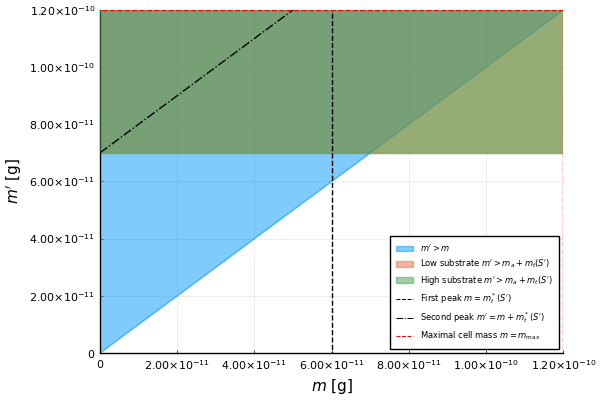

In [13]:
# plotting the feasible region
# https://stackoverflow.com/questions/48334036/how-to-fill-area-between-curves-with-plots-jl
plot(
    py"m_list", # daughter cells
    py"m_list", # mother cells
    fillrange = py"m_max",
    color = 1,
    alpha = 0.5,
    label = L"m^\prime > m",
    xlabel = L"$m$ [g]",
    ylabel = L"$m^\prime$ [g]",
    legendfontsize = 6,
    xlim = (0,py"m_max"),
    ylim = (0,py"m_max"),
    legend = :bottomright
)

plot!(
    py"m_list", # daughter cells
    py"np.ones(N)*(m_td(S_primes[0], m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h) + m_a)", # mother cells
    fillrange = py"m_max",
    color = 2,
    alpha = 0.5,
    label = L"Low substrate $m^\prime > m_a+m_t(S^\prime)$"
)

plot!(
    py"m_list", # daughter cells
    py"np.ones(N)*(m_td(S_primes[N-1], m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h) + m_a)", # mother cells
    fillrange = py"m_max",
    color = 3,
    alpha = 0.5,
    label = L"High substrate $m^\prime > m_a+m_t(S^\prime)$"
)

vline!(
    [py"m_td(S_primes[N-1], m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)"],
    color = "black",
    linestyle = :dash,
    label = L"First peak $m=m_t^*(S^\prime)$"
)

plot!(
    py"m_list", # daughter cells
    py"np.ones(N)*(m_td(S_primes[N-1], m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h) + m_a)+m_list", # mother cells
    color = "black",
    linestyle = :dashdot,
    label = L"Second peak $m^\prime=m+m_t^*(S^\prime)$"
)

hline!(
    [py"m_max"],
    color = "red",
    linestyle = :dash,
    label = L"Maximal cell mass $m=m_\operatorname{max}$"
)

vline!(
    [py"m_max"],
    color = "red",
    linestyle = :dash,
    label = ""
)

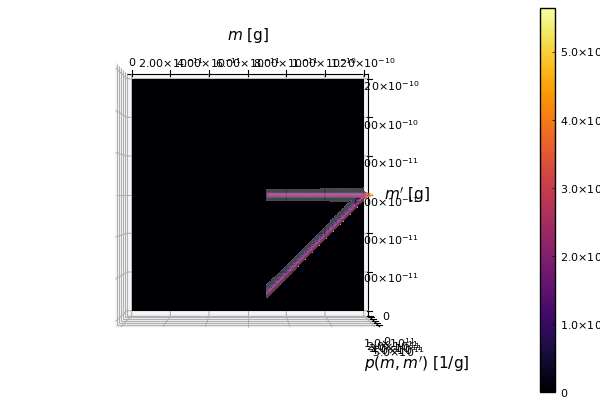

In [14]:
# p_mm_res: first index varies m / daughter mass, second index varies m_prime / mother mass, 
# third index varies S / m_t
# camera first arg controls horizontal rotation, second arg vertical rotation
# plot for low substrate levels and high substrate levels
plot(
    py"m_list",
    py"m_list",
    py"p_mm_res[:,:,int(0)]",
    st=:surface,
    camera=(0,90),
    xlabel = L"$m$ [g]",
    ylabel = L"$m^\prime$ [g]",
    zlabel = L"$p(m,m^\prime)$ [1/g]",
#     title = "Partition function"
)

# Need to transpose python objects when plotting in Julia...

In [15]:
? PyReverseDims(py"p_mm_res[:,:,int(N-1)]")

```
PyReverseDims(array)
```

Passes a Julia `array` to Python as a NumPy row-major array (rather than Julia's native column-major order) with the dimensions reversed (e.g. a 2×3×4 Julia array is passed as a 4×3×2 NumPy row-major array).  This is useful for Python libraries that expect row-major data.


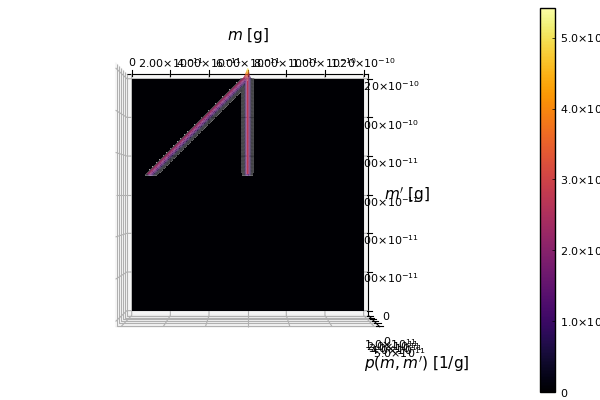

In [16]:
# p_mm_res: first index varies m / daughter mass, second index varies m_prime / mother mass, 
# third index varies S / m_t
# camera first arg controls horizontal rotation, second arg vertical rotation
# plot for low substrate levels and high substrate levels
plot(
    py"m_list",
    py"m_list",
    py"p_mm_res[:,:,int(N-1)].T",
    st=:surface,
    camera=(0,90),
    xlabel = L"$m$ [g]",
    ylabel = L"$m^\prime$ [g]",
    zlabel = L"$p(m,m^\prime)$ [1/g]",
#     title = "Partition function"
)

In [17]:
# python implementation = row-major, (4,3,2) arr has 4 slices of 3x2 arrays
# row-major = first index to scan will be a primitive row, loop nest ordering is reverse (row-index last)
# but why reverse order in dim ordering? b/c still want to enforce matrix indexing norms, 
# i.e., column ind first, row ind second
py"""
arr = np.zeros((4,3,2))
print(arr)
"""

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [18]:
# julia implementation = column-major, (4,3,2) arr has 2 slices of 4x3 arrays
# column-major = first index to scan will be a primitive column, loop nest ordering is forward (column-index first)
zeros(4,3,2)

4×3×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [19]:
# check ordering of nditer in a map object
# looks like list conversion of map objects causes indices to increment from right to left in dim tuple
py"""
check_iter = map(lambda m_ind,m_prime_ind,S_ind: [m_list[m_ind],m_list[m_ind],S_primes[S_ind]],\
np.nditer(m_ind_meshed), np.nditer(m_prime_ind_meshed), np.nditer(S_ind_meshed))

# # np.fromiter produces ValueError('setting an array element with a sequence.')
# np.fromiter(check_iter,dtype='float64')
check_iter = list(check_iter)
print(check_iter[int(N/2)])
"""

[0.0, 0.0, 12.54180602006689]


# Filtered substrate and single cell growth rate

Substrate filtering allows for modeling a delayed response of cell metabolism to changes in the environment, i.e., when filtered substrate does not equal substrate levels, cell adjusts to those substrate levels at some process time scale $\alpha$.

The single cell growth rate is non-linear and varies with filtered substrate levels in typical Monod fashion. Will need special variable-material coefficient FVM methods.

$$
\begin{gathered}
\frac{\textrm{d}S^\prime}{\textrm{d}t} = \alpha (S-S^\prime) \\
S^\prime(t=0)=S_0^\prime=S(t=0) \\
k(S') = \frac{\mu_m S^\prime}{K_m + S^\prime}
\end{gathered}
$$

Also, because filtered substrate is coupled with substrate mass balance, cannot solve them independently of each other unless doing some splitting scheme.

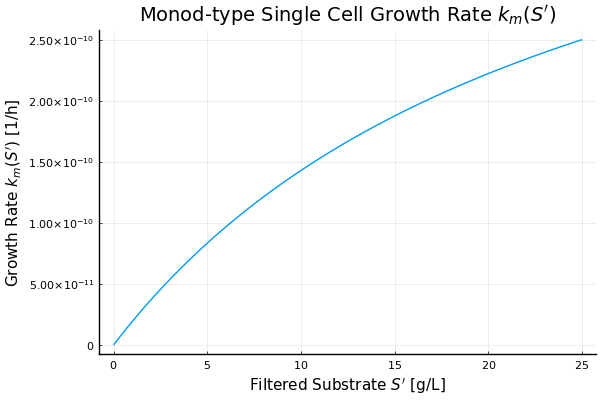

In [20]:
py"""
N=300
S_primes = np.linspace(0.0,S_f,N)
m_list = np.linspace(0.0,m_max,N)
k_m = lambda S_prime: (μ_m * S_prime)/(K_m + S_prime)

k_m_list = list(map(k_m, S_primes))
"""

plot(
    py"S_primes",
    py"k_m_list",
    xlabel = L"Filtered Substrate $S^\prime$ [g/L]",
    ylabel = L"Growth Rate $k_m(S^\prime)$ [1/h]",
    label = "",
    title = L"Monod-type Single Cell Growth Rate $k_m(S^\prime)$"
)

# Simulating the integral kernel

The integral operator acts on functions through the kernel $K(m,m^\prime,S^\prime)$, so it must be a functional. For a discretization of the domain, a continuous operator turns into a discrete operator (a function into a matrix). The integral kernel will thus be posed as a finite matrix-multiply for a fixed value of the filtered substrate $S^\prime$.

$$
\begin{gathered}
F(m,S^\prime) = \int_0^{m_{\textrm{max}}}\Gamma(m^\prime,S^\prime)p(m,m^\prime,m_t^*(S^\prime))N(m^\prime,t)dm^\prime \\
K(m,m^\prime) = \Gamma(m^\prime,S^\prime)p(m,m^\prime,m_t^*(S^\prime))
\end{gathered}
$$

In [21]:
py"""
# define for both transition mass and critical mass
def m_td(S_prime,m_td0,K_td,S_l,S_h):
    if S_prime < S_l:
        return m_td0 + K_td*(S_l - S_h)
    elif (S_prime > S_l) and (S_prime < S_h):
        return m_td0 + K_td*(S_prime - S_h)
    else:
        return m_td0

# define fission rate function
@np.vectorize
def Γ(m,γ,ϵ,m_t,m_d,m_a):
    if m < m_t+m_a:
        return 0.0
    elif (m > m_t+m_a) and (m < m_d):
        return γ*np.exp(-ϵ*(m-m_d)**2)
    else:
        return γ

def p_mm(m,m_prime,m_t,m_a,A,β):
    if m > m_prime:
        return 0.0
    elif m_prime < (m_t + m_a):
        return 0.0
    else:
        # full expression produces overflow errors, maybe do post-processing
        # A*(np.exp(β*(m-m_t)**2)+np.exp(β*(m-m_prime+m_t)**2))
        # turns out Hensen paper had typos!! should have negative sign in front of β's
        return A*(np.exp(-β*(m-m_t)**2)+np.exp(-β*(m-m_prime+m_t)**2))

def kernel_mat(m_list, N_m, m_t, m_a, A, β, Γ):

    p_mm_mat = np.zeros((N_m,N_m))

    for j in np.arange(0,N_m):
        for i in np.arange(0,N_m):
            p_mm_mat[j,i] = p_mm(m = m_list[i], m_prime = m_list[j], m_t=m_t, m_a=m_a, A=A, β=β)
    
    # np.multiply is an element-wise multiplication of the two input arrays, i.e., explicit broadcasting
    kernel_m = np.multiply(np.outer(Γ, np.ones(N_m)), p_mm_mat) # mother cell info on columns

    return kernel_m

# given a single S_prime, compute all the necessary components
N=300
S_primes = np.linspace(0.0,S_f,N)
m_list = np.linspace(0.0,m_max,N)

S_prime_test = S_primes[int(N/2)]
m_t_test = m_td(S_prime_test, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)
m_d_test = m_td(S_prime_test, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h)
m_ta_test = m_t_test + m_a

# fission rate
Γ_res_test = Γ(m = m_list, γ=γ, ϵ=ϵ, m_t=m_t_test, m_d=m_d_test, m_a=m_a)
print(np.amax(Γ_res_test))

# partition function
p_mm_test = np.zeros((N,N))
for j in np.arange(0,N):
    for i in np.arange(0,N):
        p_mm_test[j,i] = p_mm(m = m_list[i], m_prime = m_list[j], m_t=m_t_test, m_a=m_a, A=A, β=β)
print(np.amax(p_mm_test))

# kernel computation
kernel_test = kernel_mat(m_list = m_list, N_m=N, m_t=m_t_test, m_a=m_a, A=A, β=β, Γ=Γ_res_test)
print(np.shape(kernel_test))
print("hi")
print(np.amax(kernel_test))

# compute integral expression
# some IC params where one would expect some fissioning
μ_0 = 10.0e-11                # g, initial cell mass distribution mean
σ_0 = 1.0e-11                 # g, initial cell mass distribution standard deviation
N_00 = 1.0e4                  # -, initial total number of cells
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
N_0m = N_00 * norm.pdf(m_list, loc = μ_0 , scale = σ_0)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)
del_m_list = (m_list[1] - m_list[0]) * np.ones(N)
F = np.zeros(N)
for i in range(0,N):
    F[i] = midpt_trapz(del_m_list, np.multiply(kernel_test[:,i],N_0m))

"""

200.0
541922135731.1204
(300, 300)
hi
108384427146224.08


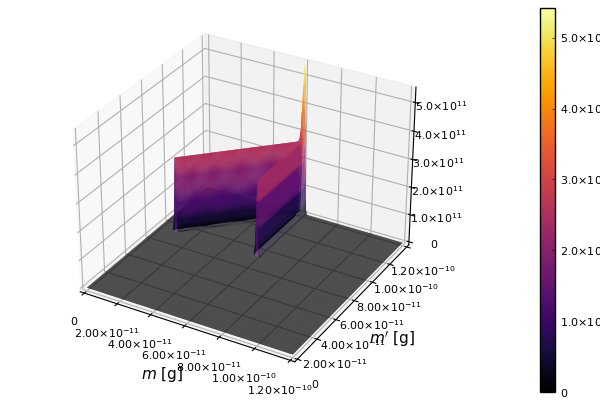

In [22]:
plot(
    py"m_list",
    py"m_list",
    py"p_mm_test", # no transpose here since built the matrix in transposed fashion
    st=:surface,
    xlabel = L"$m$ [g]",
    ylabel = L"$m^\prime$ [g]"
)

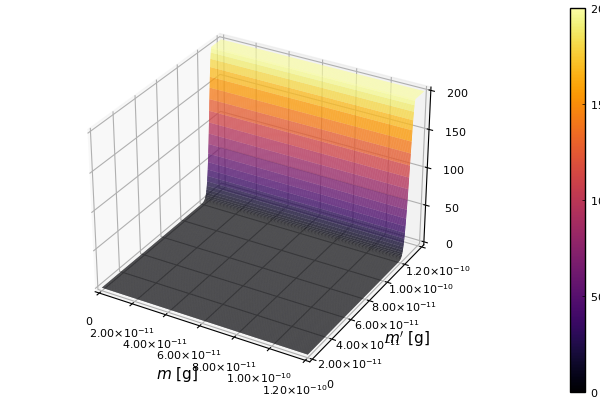

In [23]:
plot(
    py"m_list",
    py"m_list",
    py"np.outer(Γ_res_test, np.ones(N))",
    st=:surface,
    xlabel = L"$m$ [g]",
    ylabel = L"$m^\prime$ [g]"
)

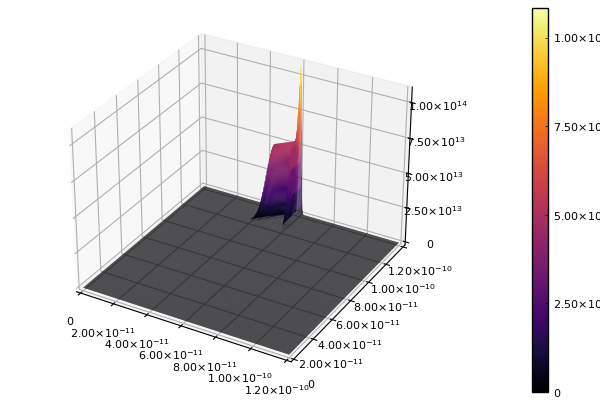

In [24]:
plot(
    py"m_list",
    py"m_list",
    py"kernel_test",#     py"np.multiply(np.outer(Γ_res_test, np.ones(N)),p_mm_test)",
    st=:surface
)

In [25]:
py"print(m_t_test)"

6e-11


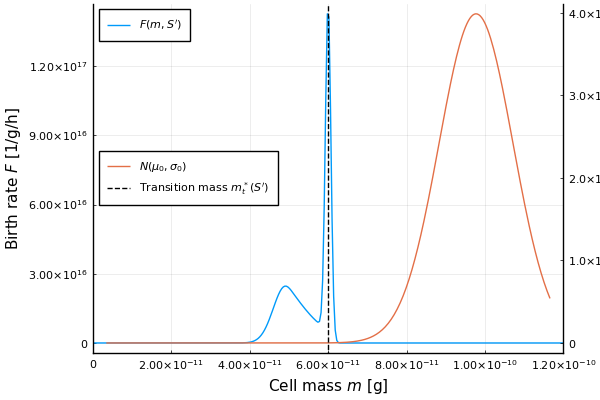

In [26]:
p1 = plot(
    py"m_list",
    py"F",
    legend = :topleft,
    label = L"$F(m,S^\prime)$",
    xlabel = L"Cell mass $m$ [g]",
    ylabel = L"Birth rate $F$ [1/g/h]",
    xlim = (0.0,py"m_max")
)

twin_s = twinx(p1)

plot!(
    twin_s,
    py"m_list",
    py"N_0m",
    label = L"$N(\mu_0,\sigma_0)$",
    ylabel = L"Cell Number Distribution $N(m,t)$",
    color = 2,
    legend = :left
)

vline!(
    twin_s,
    [py"m_t_test"],
    label = L"Transition mass $m_t^*(S^\prime)$",
    color = "black",
    linestyle = :dash
)

p1[1].plt

# Simulating RHS function of the PBM

The RHS of the function determines both the birth and death of cells (through exit from reactor and fissioning of mother cells to produce a smaller mother cell and a daughter cell). It has the form:

$$
\Psi(t,m,N) = 2\int_0^{m_{\textrm{max}}}\Gamma(m^\prime,S^\prime)p(m,m^\prime,m_t^*(S^\prime))N(m^\prime,t)dm^\prime - [D+\Gamma(m,S^\prime)]N(m,t),
$$

and involves an integration of the integral kernel on the mesh defined for cell mass. This can be tested on the initial condition for the cell mass distribution, $N_0(m)$, which is given by:

$$
N(m,0) = N_0(m) = \frac{N_{00}}{\sigma_0\sqrt{2\pi}} \exp\left(\frac{-(m-\mu_0)^2}{2\sigma_0^2}\right).
$$

# PyClaw for PBM simulation

To be specific, we are using PyClaw's SharpClaw solvers to solve the following IPDE for the yeast cell number $N(m,t)$ mass distribution in a continuous yeast bioreactor with one feed component $S$:

$$
\begin{gathered}
\frac{\partial N(m,t)}{\partial t} + \frac{\partial [ k(S^\prime) N(m,t) ]}{\partial m} = \\ 2\int_0^{m_{\textrm{max}}}\Gamma(m^\prime,S^\prime)p(m,m^\prime,m_t^*(S^\prime))N(m^\prime,t)dm^\prime - [D+\Gamma(m,S^\prime)]N(m,t) = \Psi(t,m,N),\\
\textrm{IC: }N(m,0) = N_0(m) = \frac{N_{00}}{\sigma_0\sqrt{2\pi}} \exp\left(\frac{-(m-\mu_0)^2}{2\sigma_0^2}\right), \\
\textrm{Regularity condition/inflow BC: } G(0,t)N(0,t) = \lim_{m\to m_{\textrm{max}}} G(m,t)N(m,t) = 0
\end{gathered}
$$

where all parameters are found in Table 1 of paper, and

$$
\Gamma(m, S') = 
\begin{cases} 
0 & m\lt m_t^*(S^\prime)+m_a \\
\gamma \operatorname{exp}(-\epsilon(m-m_d^*(S^\prime))^2) & m \in [m_t^*(S^\prime)+m_a, m_d^*(S^\prime)] \\
\gamma & m \in (m_d^*(S^\prime),m_\textrm{max}]
\end{cases}
$$

$$
p(m,m',m_t^*) = 
\begin{cases}
A \operatorname{exp}(-\beta (m-m_t^*)^2)+\operatorname{exp}(-\beta(m-m^\prime+m_t^*)^2) & (m \lt m^\prime) \vee (m^\prime \gt m_t^*+m_a) \\
0 & \textrm{else}
\end{cases}
$$

$$
\begin{gathered}
k(S') = \frac{\mu_m S^\prime}{K_m + S^\prime}
\end{gathered}
$$

Explicitly, this is not a variable-advection problem since $k(S^\prime)$ does not directly depend on the cell mass $m$. The coupling instead is weak and through the substrate utilization rate expressions. The substrate model equations will be solved through Julia's numerical ODE solvers, and coupled into the PyClaw solver through the controller. Hopefully this interaction will not carry too much solver start/stop overheads and computational expense.

# DifferentialEquations.jl for DAEs

As mentioned above, we have Julia solvers to solve for the ODE system at every time point. Sequentially, PyClaw will solve forward one step, then pass to the ODE model for one step, then back to PyClaw. 

$$
\begin{gathered}
\frac{\textrm{d}S^\prime}{\textrm{d}t} = \alpha (S-S^\prime) \\
S^\prime(t=0)=S_0^\prime=S(t=0) \\
k(S') = \frac{\mu_m S^\prime}{K_m + S^\prime}.
\end{gathered}
$$

See below in more detail.

In [27]:
? PyObject()

```
PyObject(juliavar)
```

This converts a julia variable to a PyObject, which is a reference to a Python object. You can convert back to native julia types using `convert(T, o::PyObject)`, or using `PyAny(o)`.

Given `o::PyObject`, `o[:attribute]` is equivalent to `o.attribute` in Python, with automatic type conversion.

Given `o::PyObject`, `get(o, key)` is equivalent to `o[key]` in Python, with automatic type conversion.


In [28]:
# to get objects from Julia into Python namespace, interpolate them into the exec func py""" """
# need to reverse Julia object dims from column-major to row-major ordering for Python
# https://github.com/JuliaPy/PyCall.jl#from-julia-to-python
sample_arr = [1 2 3; 2 3 4]
sample_arr_py = PyReverseDims(sample_arr)
println(typeof(sample_arr_py))

# `$` interpolation, technically NOT string interpolation, but rather causes default conversion to a 
# PyObject, and then interpolates the value
# `$$` interpolation is for string interpolation, can interpolate arbitrary python scripts
# https://github.com/JuliaPy/PyCall.jl#calling-python
py"""
print(np.pi)
sample_arr_pypy = $(sample_arr_py)
print(sample_arr_pypy)
print(type(sample_arr_pypy))
"""

PyObject
3.141592653589793
[[1 2]
 [2 3]
 [3 4]]
<class 'numpy.ndarray'>


# Assumptions

1. only one substrate (primary metabolite)
2. initial cell mass distribution (not given in the paper) is posed as a standard Gaussian distribution parameterized by mean $\mu_0$ and $\sigma_0^2$ (although fig. 9 in the paper makes it look like a bimodal distribution...)

# Test with constant substrate concentration

In [29]:
py"""
np.linspace(0.0,10.0,100)
"""

In [38]:
# encapsulated attempt at FVM using Pyclaw
py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

from clawpack import pyclaw
from clawpack import riemann

# define helper functions
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)
k_m = lambda S_prime: (μ_m * S_prime)/(K_m + S_prime)

# define for both transition mass and critical mass
def m_td(S_prime,m_td0,K_td,S_l,S_h):
    if S_prime < S_l:
        return m_td0 + K_td*(S_l - S_h)
    elif (S_prime > S_l) and (S_prime < S_h):
        return m_td0 + K_td*(S_prime - S_h)
    else:
        return m_td0

# define fission rate function
@np.vectorize
def Γ(m,γ,ϵ,m_t,m_d,m_a):
    if m < m_t+m_a:
        return 0.0
    elif (m > m_t+m_a) and (m < m_d):
        return γ*np.exp(-ϵ*(m-m_d)**2)
    else:
        return γ

# partition function
def p_mm(m,m_prime,m_t,m_a,A,β):
    if m > m_prime:
        return 0.0
    elif m_prime < (m_t + m_a):
        return 0.0
    else:
        # full expression produces overflow errors, maybe do post-processing
        # A*(np.exp(β*(m-m_t)**2)+np.exp(β*(m-m_prime+m_t)**2))
        # turns out Hensen paper had typos!! should have negative sign in front of β's
        return A*(np.exp(-β*(m-m_t)**2)+np.exp(-β*(m-m_prime+m_t)**2))

def kernel_mat(m_list, N_m, m_t, m_a, A, β, Γ):

    p_mm_mat = np.zeros((N_m,N_m))

    for j in np.arange(0,N_m):
        for i in np.arange(0,N_m):
            p_mm_mat[j,i] = p_mm(m = m_list[i], m_prime = m_list[j], m_t=m_t, m_a=m_a, A=A, β=β)
    
    # np.multiply is an element-wise multiplication of the two input arrays, i.e., explicit broadcasting
    kernel_m = np.multiply(np.outer(Γ, np.ones(N_m)), p_mm_mat) # mother cell info on columns
    print(np.amax(kernel_m))
    return kernel_m

# for generating the RHS of the solver, but also fed directly to solver
def dq_linhom_src(solver,state,dt):
    
    N_mt = state.q[0,:]
    Γ = state.aux[0,:] # Γ
    mc = state.grid.m.centers
    del_mc_list = np.multiply(np.ones(len(mc)), (mc[1]-mc[0]))

    # compute integral expression
    F = np.zeros(N_m)
    for i in range(1,N_m+1):
        F[i-1] = midpt_trapz(del_mc_list, np.multiply(state.aux[i,:], N_mt))

    # compute full RHS source term
    D = state.problem_data['D']
    dq = np.empty(state.q.shape)
    dq[0,:] = dt * (-(D + Γ) * N_mt + 2.0 * F)   
    return dq

# setup global scope vars (no need to declare them as global, see https://realpython.com/python-namespaces-scope/#variable-scope)
# physical parameters from Table 1 (Cell population model parameters)
γ = 200.0                     # 1/hr, maximum fission rate, when cell m ≥ m_d
A = np.sqrt(25/np.pi)*1.0e11  # 1/g, partition function exponential prefactors (i.e., p(m,m'))
S_l = 0.1                     # g/L, low substrate limit
K_t = 0.01e-11                # g/g/L, proportionality constant for change in transition mass with substrate levels
m_t0 = 6.0e-11                # g, initial transition mass (at low substrate levels)
m_max = 12.0e-11              # g, maximal cell mass allowed
Y = 0.4                       # g/g, yield coefficient for cell mass to mols substrate
K_m = 25.0                    # g/L, Monod constant for single cell growth rate
D = 0.25                      # 1/h, dilution rate in continuous bioreactor operation
ϵ = 5.0e22                    # g^{-2}, inverse variance for fission rate when cells are in fissioning state
β = 100.0e22                  # g^{-2}, another inverse variance for partition function
S_h = 2.0                     # g/L, high substrate limit
K_d = 2.0e-11                 # g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
m_d0 = 11.0e-11               # g, initial critical fissioning mass (at low substrate levels)
m_a = 1.0e-11                 # g, additional mass that mother cell must gain to start fissioning
μ_m = 5.0e-10                 # g/h, single cell growth rate in limit of high substrate levels
α = 20.0                      # 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
S_f = 25.0                    # g/L, feed concentration of substrate to continuous bioreactor
μ_0 = 3.0e-11                 # g, initial cell mass distribution mean
σ_0 = 1.0e-11                 # g, initial cell mass distribution standard deviation
N_00 = 1.0e4                  # -, initial total number of cells

# numerical parameters
N_m = 100                     # number of grid points in mass domain
N_t = 100                     # number of grid points in time domain
tf = 10.0                     # final time

# constant filtered substrate concentration
S_prime_test = S_f / 2.0
m_t_test = m_td(S_prime_test, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)
m_d_test = m_td(S_prime_test, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h)
m_ta_test = m_t_test + m_a

# set up solver
solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
solver.kernel_language = 'Python'
solver.weno_order = 5
solver.time_integrator = 'SSP104'
solver.dq_src = dq_linhom_src
solver.bc_lower[0] = pyclaw.BC.extrap
solver.bc_upper[0] = pyclaw.BC.extrap
solver.aux_bc_lower[0]=pyclaw.BC.extrap
solver.aux_bc_upper[0]=pyclaw.BC.extrap

# domain
m = pyclaw.Dimension(0.0,m_max,N_m,name='m')
domain = pyclaw.Domain(m)
num_aux=1+N_m
state = pyclaw.State(domain,solver.num_eqn,num_aux)

# dynamic parameters and control parameters
state.problem_data['u'] = k_m(S_prime_test)  # growth rate
state.problem_data['D'] = D                  # dilution rate

# initialize q and aux vars
# aux vars are for holding fission rate Γ vector and kernel K(m,m',S') matrix
mc = state.grid.m.centers
Γ_res_test = Γ(m = mc, γ=γ, ϵ=ϵ, m_t=m_t_test, m_d=m_d_test, m_a=m_a)
kernel_test = kernel_mat(m_list=mc, N_m=N_m, m_t=m_t_test, m_a=m_a, A=A, β=β, Γ=Γ_res_test)
state.q[0,:] = N_00 * norm.pdf(mc, loc = μ_0 , scale = σ_0)
state.q[0,0] = 0.0 # set lowest mass mesh point state value to 0 to help with extrapolating BC on LHS of domain
state.aux[0,:] = Γ_res_test
for i in range(1,N_m+1):
    state.aux[i,:] = kernel_test[:,i-1]

# Controller
claw = pyclaw.Controller()
claw.keep_copy = True
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.tfinal = tf
claw.output_style = 1 # for stepping at certain intervals defined by np.linspace(0.0,tf,N_t)
claw.output_times = np.linspace(0.0,tf,N_t) # need this for plotting later
claw.num_output_times = N_t
# claw.nstepout = 10
# claw.keep_copy = 1
# claw.verbosity = 2

# run
status = claw.run()
print(claw)
print(solver.kernel_language)
"""

95781129940489.83
2023-05-27 16:45:43,670 INFO CLAW: Solution 0 computed for time t=0.000000
hi this is me
2023-05-27 16:45:43,704 INFO CLAW: Solution 1 computed for time t=0.100000
hi this is me
2023-05-27 16:45:43,730 INFO CLAW: Solution 2 computed for time t=0.200000
hi this is me
2023-05-27 16:45:43,754 INFO CLAW: Solution 3 computed for time t=0.300000
hi this is me
2023-05-27 16:45:43,778 INFO CLAW: Solution 4 computed for time t=0.400000
hi this is me
2023-05-27 16:45:43,801 INFO CLAW: Solution 5 computed for time t=0.500000
hi this is me
2023-05-27 16:45:43,825 INFO CLAW: Solution 6 computed for time t=0.600000
hi this is me
2023-05-27 16:45:43,849 INFO CLAW: Solution 7 computed for time t=0.700000
hi this is me
2023-05-27 16:45:43,875 INFO CLAW: Solution 8 computed for time t=0.800000
hi this is me
2023-05-27 16:45:43,900 INFO CLAW: Solution 9 computed for time t=0.900000
hi this is me
2023-05-27 16:45:43,923 INFO CLAW: Solution 10 computed for time t=1.000000
hi this is me
20

In [36]:
py"claw.problem_data"

Dict{Any, Any} with 2 entries:
  "u" => 1.66667e-10
  "D" => 0.25

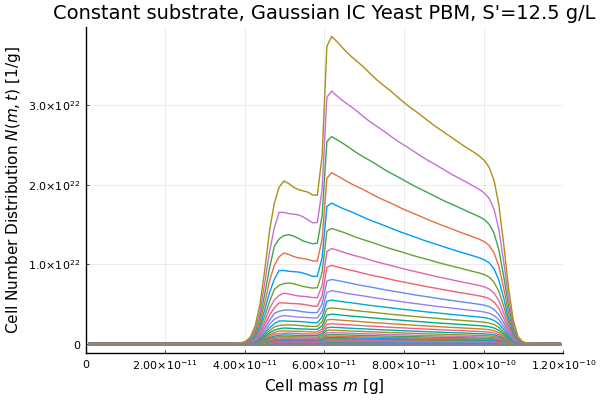

In [31]:
# Just use Julia to plot the desired plots
centers = py"claw.centers"
results = py"claw.frames"
times = py"claw.output_times"
p = plot(
    xlim = (0.0,py"m_max"),
    title = "Constant substrate, Gaussian IC Yeast PBM, S'=$(py"S_prime_test") g/L",
    xlabel = L"Cell mass $m$ [g]",
    ylabel = L"Cell Number Distribution $N(m,t)$ [1/g]",
)
for i in 1:length(results)
    plot!(p,centers,results[i].q[1,:],label="")
end
p

┌ Info: Saved animation to 
│   fn = /home/kkganko/oscillatory_bioreactor/Constant-substrate-yeast-PBM.gif
└ @ Plots /home/kkganko/.julia/packages/Plots/lW9ll/src/animation.jl:137


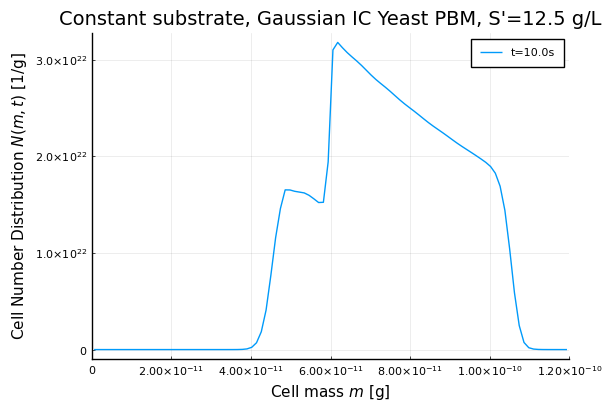

In [32]:
# animate the solution
centers = py"claw.centers"
results = py"claw.frames"
times = py"claw.output_times"
zeroth_moment_list = []

anim_const_S_prime_PBM = Animation()
for i in 1:length(times)
    p1 = plot(
        centers,
        results[i].q[1,:],
        label="t=$(times[i])s",
        xlim = (0.0,py"m_max"),
        title = "Constant substrate, Gaussian IC Yeast PBM, S'=$(py"S_prime_test") g/L",
        xlabel = L"Cell mass $m$ [g]",
        ylabel = L"Cell Number Distribution $N(m,t)$ [1/g]"
    )
    py"""
    del_mc_list = np.multiply(np.ones(len(claw.centers[0])), (claw.centers[0][1]-claw.centers[0][0]))
    zero_moment = midpt_trapz(del_mc_list,claw.frames[$(i-1)].q[0,:])
    """
    push!(zeroth_moment_list, py"zero_moment")
    frame(anim_const_S_prime_PBM)
end

# save to files
anim_FDcomp_fp = "Constant-substrate-yeast-PBM.gif" # cannot have special characters in this file name!!! things like : will break it
anim_FDcomp_savepath = joinpath(pwd(), anim_FDcomp_fp)
gif_comp = gif(anim_const_S_prime_PBM, anim_FDcomp_savepath, fps = 2);

Plots.AnimatedGif("/home/kkganko/oscillatory_bioreactor/Constant-substrate-yeast-PBM.gif")
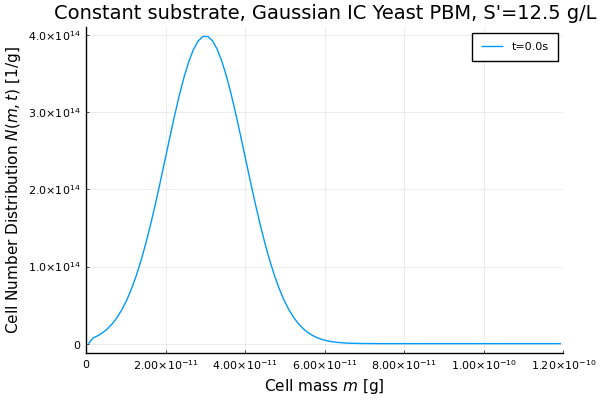

In [33]:
gif_comp

# Zeroth moment reduction

Taking the zeroth moment of the PBM produces the following equation:

$$
\frac{\textrm{d}m_0}{\textrm{d}t} = -D m_0 + \int_0^{m_\textrm{max}}\Gamma(m,S^\prime)N(m,t)\textrm{d}m~. 
$$

This ODE describes the prototypical continuous bioreactor cell balance equation, i.e., exponential growth of cells with a dilution term due to continuous outflow. The integral component can be reduced to the structured net growth factor $(\mu-k_d)m_0$.

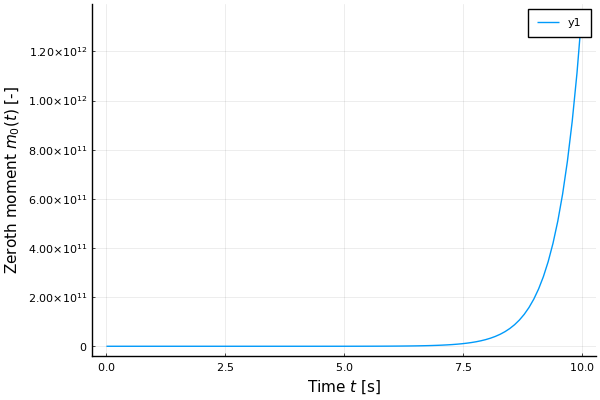

In [34]:
plot(
    times,
    zeroth_moment_list,
    xlabel = L"Time $t$ [h]",
    ylabel = L"Zeroth moment $m_0(t)$ [-]"
)

# DAE system to solve

When filtered substrate levels are not held constant, the following system of mass balances are used to solve for them, where the total number of cells is given by the truncated zeroth moment $m_0(t)$:

$$
\begin{gathered}
m_0(t)=\int_0^{m_\textrm{max}}N(m,t)\textrm{d}m \\
\frac{\textrm{d}S}{\textrm{d}t} = D(S_f-S)-\int_0^{m_\textrm{max}}\frac{k(S^\prime)}{Y} N(m,t)\textrm{d}m = D(S_f-S)-\frac{k(S^\prime)}{Y}m_0(t)
\end{gathered}
$$

$$
\begin{gathered}
\frac{\textrm{d}S^\prime}{\textrm{d}t} = \alpha (S-S^\prime) \\
S^\prime(t=0)=S_0^\prime=S(t=0) \\
k(S') = \frac{\mu_m S^\prime}{K_m + S^\prime}
\end{gathered}
$$

The system above is a DAE system since $m_0(t)$ appears as an algebraic variable. The PBM solve and integration to obtain the zeroth order moment $m_0(t)$ can be wrapped into a Python function which takes the Julia DAE solver arguments.

# Observation: Need to simulate for one time-step starting from 0.0 going to `dt` b/c PyClaw controller.py is not constructed in the manner to allow arbitrary initial times in logger

# Observation: Need to strictly enforce conversion from `np.float64` to `int` on `N_m` parameter inside Python

# Observation: When specifying `claw.out_times`, need to include initial timepoint, i.e., `claw.out_times = np.array([0.0,dt])` (otherwise, get an error related to referencing a future py.claw status object before defining it)

# Observation: Will need to carry over the initialization for the PBM in the parameters vector for ODE routines in Julia as well as the zeroth moment, and use callbacks to step the PBM forward and update the N_IC and zeroth moment parameters at every time step (in effect, m0 algebraic variable acts as a time-varying input)

In [225]:
# wrapper for PyClaw routine
py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

from clawpack import pyclaw
from clawpack import riemann

# define helper functions
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)
k_m = lambda S_prime: (μ_m * S_prime)/(K_m + S_prime)

# define for both transition mass and critical mass
def m_td(S_prime,m_td0,K_td,S_l,S_h):
    if S_prime < S_l:
        return m_td0 + K_td*(S_l - S_h)
    elif (S_prime > S_l) and (S_prime < S_h):
        return m_td0 + K_td*(S_prime - S_h)
    else:
        return m_td0

# define fission rate function
@np.vectorize
def Γ(m,γ,ϵ,m_t,m_d,m_a):
    if m < m_t+m_a:
        return 0.0
    elif (m > m_t+m_a) and (m < m_d):
        return γ*np.exp(-ϵ*(m-m_d)**2)
    else:
        return γ

# partition function
def p_mm(m,m_prime,m_t,m_a,A,β):
    if m > m_prime:
        return 0.0
    elif m_prime < (m_t + m_a):
        return 0.0
    else:
        # full expression produces overflow errors, maybe do post-processing
        # A*(np.exp(β*(m-m_t)**2)+np.exp(β*(m-m_prime+m_t)**2))
        # turns out Hensen paper had typos!! should have negative sign in front of β's
        return A*(np.exp(-β*(m-m_t)**2)+np.exp(-β*(m-m_prime+m_t)**2))

def kernel_mat(m_list, N_m, m_t, m_a, A, β, Γ):

    p_mm_mat = np.zeros((N_m,N_m))

    for j in np.arange(0,N_m):
        for i in np.arange(0,N_m):
            p_mm_mat[j,i] = p_mm(m = m_list[i], m_prime = m_list[j], m_t=m_t, m_a=m_a, A=A, β=β)
    
    # np.multiply is an element-wise multiplication of the two input arrays, i.e., explicit broadcasting
    kernel_m = np.multiply(np.outer(Γ, np.ones(N_m)), p_mm_mat) # mother cell info on columns
    return kernel_m

# for generating the RHS of the solver, but also fed directly to solver
def dq_linhom_src(solver,state,dt):

    N_mt = state.q[0,:]
    Γ = state.aux[0,:] # Γ
    mc = state.grid.m.centers
    del_mc_list = np.multiply(np.ones(state.problem_data['N_m']), (mc[1]-mc[0]))

    # compute integral expression
    F = np.zeros(state.problem_data['N_m'])
    for i in range(1,state.problem_data['N_m']+1):
        F[i-1] = midpt_trapz(del_mc_list, np.multiply(state.aux[i,:], N_mt))

    # compute full RHS source term
    dq = np.empty(state.q.shape)
    D = state.problem_data['D']
    dq[0,:] = dt * (-(D + Γ) * N_mt + 2.0 * F) 
  
    return dq

def step_yeast_PBM(S_prime, p_PBE, N_IC, dt):

    γ = p_PBE[0]                   # 1/hr, maximum fission rate, when cell m ≥ m_d
    A = p_PBE[1]                   # 1/g, partition function exponential prefactors (i.e., p(m,m'))
    S_l = p_PBE[2]                 # g/L, low substrate limit
    K_t = p_PBE[3]                 # g/g/L, proportionality constant for change in transition mass with substrate levels
    m_t0 = p_PBE[4]                # g, initial transition mass (at low substrate levels)
    m_max = p_PBE[5]               # g, maximal cell mass allowed
    Y = p_PBE[6]                   # g/g, yield coefficient for cell mass to mols substrate
    K_m = p_PBE[7]                 # g/L, Monod constant for single cell growth rate
    D = p_PBE[8]                   # 1/h, dilution rate in continuous bioreactor operation
    ϵ = p_PBE[9]                   # g^{-2}, inverse variance for fission rate when cells are in fissioning state
    β = p_PBE[10]                  # g^{-2}, another inverse variance for partition function
    S_h = p_PBE[11]                # g/L, high substrate limit
    K_d = p_PBE[12]                # g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
    m_d0 = p_PBE[13]               # g, initial critical fissioning mass (at low substrate levels)
    m_a = p_PBE[14]                # g, additional mass that mother cell must gain to start fissioning
    μ_m = p_PBE[15]                # g/h, single cell growth rate in limit of high substrate levels
    α = p_PBE[16]                  # 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
    S_f = p_PBE[17]                # g/L, feed concentration of substrate to continuous bioreactor
    N_m = int(p_PBE[18])           # number of grid points in mass domain

    # constant filtered substrate concentration
    m_t_test = m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)
    m_d_test = m_td(S_prime, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h)
    m_ta_test = m_t_test + m_a

    # set up solver
    solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
    solver.kernel_language = 'Python'
    solver.weno_order = 5
    solver.time_integrator = 'SSP104'
    solver.dq_src = dq_linhom_src
    solver.bc_lower[0] = pyclaw.BC.extrap
    solver.bc_upper[0] = pyclaw.BC.extrap
    solver.aux_bc_lower[0]=pyclaw.BC.extrap
    solver.aux_bc_upper[0]=pyclaw.BC.extrap

    # domain
    m = pyclaw.Dimension(0.0,m_max,N_m,name='m')
    domain = pyclaw.Domain(m)
    num_aux=1+N_m
    state = pyclaw.State(domain,solver.num_eqn,num_aux)

    # parameters
    state.problem_data['u'] = k_m(S_prime)  # growth rate
    state.problem_data['D'] = D             # dilution rate
    state.problem_data['N_m'] = N_m         # size of problem

    # initialize q and aux vars
    # aux vars are for holding fission rate Γ vector and kernel K(m,m',S') matrix
    mc = state.grid.m.centers
    Γ_res_test = Γ(m = mc, γ=γ, ϵ=ϵ, m_t=m_t_test, m_d=m_d_test, m_a=m_a)
    kernel_test = kernel_mat(m_list=mc, N_m=N_m, m_t=m_t_test, m_a=m_a, A=A, β=β, Γ=Γ_res_test)
    state.q[0,:] = N_IC
    state.q[0,0] = 0.0 # set lowest mass mesh point state value to 0 to help with extrapolating BC on LHS of domain
    state.aux[0,:] = Γ_res_test
    for i in range(1,N_m+1):
        state.aux[i,:] = kernel_test[:,i-1]
    
    # Controller
    claw = pyclaw.Controller()
    claw.keep_copy = True # saves copy of outputs to claw.frames
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver
    claw.tfinal = dt
    claw.output_style = 2 # for stepping to exact times desired given out_times
    #claw.num_output_times = 1
    claw.out_times = np.array([0.0,dt]) # output solution only at final step
    claw.verbosity = False
    
    # run and compute zeroth order moment
    claw.run()
    del_mc_list = np.multiply(np.ones(len(claw.centers[0])), (claw.centers[0][1]-claw.centers[0][0]))
    zero_moment = midpt_trapz(del_mc_list,claw.frames[1].q[0,:])

    return (claw.frames[1].q[0,:], zero_moment) # grab last timepoint result for N(m,t) and zeroth moment
"""

# helper functions
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed

# params
γ = 200.0                     # 1) 1/hr, maximum fission rate, when cell m ≥ m_d
A = sqrt(25/π)*1.0e11         # 2) 1/g, partition function exponential prefactors (i.e., p(m,m'))
S_l = 0.1                     # 3) g/L, low substrate limit
K_t = 0.01e-11                # 4) g/g/L, proportionality constant for change in transition mass with substrate levels
m_t0 = 6.0e-11                # 5) g, initial transition mass (at low substrate levels)
m_max = 12.0e-11              # 6) g, maximal cell mass allowed
Y = 0.4                       # 7) g/g, yield coefficient for cell mass to mols substrate
K_m = 25.0                    # 8) g/L, Monod constant for single cell growth rate
D = 0.25                      # 9) 1/h, dilution rate in continuous bioreactor operation
ϵ = 5.0e22                    # 10) g^{-2}, inverse variance for fission rate when cells are in fissioning state
β = 100.0e22                  # 11) g^{-2}, another inverse variance for partition function
S_h = 2.0                     # 12) g/L, high substrate limit
K_d = 2.0e-11                 # 13) g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
m_d0 = 11.0e-11               # 14) g, initial critical fissioning mass (at low substrate levels)
m_a = 1.0e-11                 # 15) g, additional mass that mother cell must gain to start fissioning
μ_m = 5.0e-10                 # 16) g/h, single cell growth rate in limit of high substrate levels
α = 20.0                      # 17) 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
S_f = 25.0                    # 18) g/L, feed concentration of substrate to continuous bioreactor
N_m = 500                     # 19) -, number of grid points in mass domain

p_PBE = [
    γ,
    A,
    S_l,
    K_t,
    m_t0,
    m_max,
    Y,
    K_m,
    D,
    ϵ,
    β,
    S_h,
    K_d,
    m_d0,
    m_a,
    μ_m,
    α,
    S_f,
    N_m
]

# IC conditions
μ_0 = 3.0e-11                 # g, initial cell mass distribution mean
σ_0 = 1.0e-11                 # g, initial cell mass distribution standard deviation
N_00 = 1.0e4                  # -, initial total number of cells
m_edges = collect(range(0.0,m_max,N_m+1))
mc = ((m_edges[2] - m_edges[1]) / 2.0) .+ m_edges[1:end-1]
N_IC = N_00 .* N_pdf(mc,μ_0,σ_0)
dt = 0.05 # use small steps
S_prime = S_f / 2.0
N_mt_res, m0_res = py"step_yeast_PBM"(S_prime, p_PBE, N_IC, dt);

hi this is me


9861.361006044612


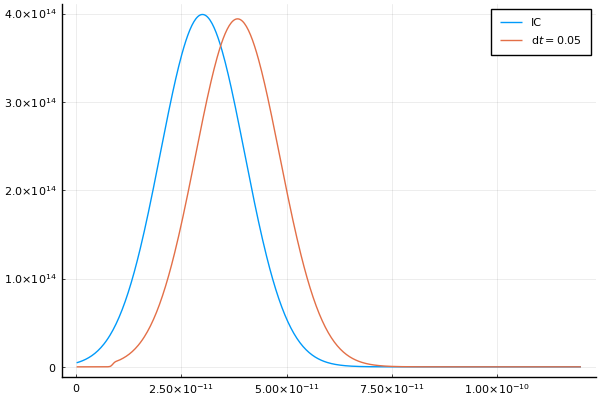

In [226]:
println(m0_res)
plot(
    mc,
    N_IC,
    label = "IC"
)

plot!(
    mc,
    N_mt_res,
    label = L"d$t=$%$(dt)"
)

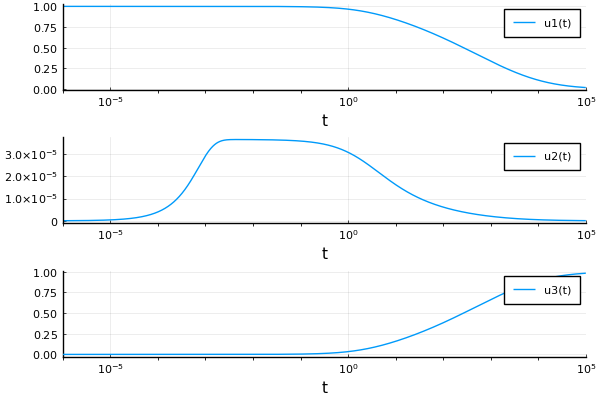

In [133]:
# test DAE integrator control
function rober!(du, u, p, t)
    y₁, y₂, y₃ = u
    k₁, k₂, k₃ = p
    du[1] = -k₁ * y₁ + k₃ * y₂ * y₃
    du[2] = k₁ * y₁ - k₃ * y₂ * y₃ - k₂ * y₂^2
    du[3] = y₁ + y₂ + y₃ - 1
    nothing
end
M = [1.0 0 0
     0 1.0 0
     0 0 0]
f = ODEFunction(rober!, mass_matrix = M)
prob_mm = ODEProblem(f, [1.0, 0.0, 0.0], (0.0, 1e5), (0.04, 3e7, 1e4))
sol = solve(prob_mm, Rodas5(), reltol = 1e-8, abstol = 1e-8)

plot(sol, xscale = :log10, tspan = (1e-6, 1e5), layout = (3, 1))

# Turns out, you don't need to numerically solve using a DAE solver

Rather, one may reformulate the system using callbacks such that the cell mass distribution $N(m,t)$ and its corresponding zeroth order moment $m_0(t)$ may be stored in the parameters vector and updated with event functions called at each timestep. The callback computes the current step cell mass distribution $N_i(m,t)$ using the current timestep size $\Delta t$ (available through the ODE integrator), the previous filtered substrate $S^\prime$ state from the ODE solution, the physical parameters $p_{\textrm{PBM}}$, and the previous cell mass distribution $N_{i-1}(m,t)$ as the initialization to the PyClaw solver.

One may consider this approach a DAE solution where the algebraic states (i.e., the cell mass mesh nodes) are offloaded to the parameters vector, and whose values depends on an implicit solve of the PBM by PyClaw.

The alternative is to create algebraic variables for each cell mass mesh point and track them explicitly within the ODE problem definition. This will greatly increase the number of states in the simulation, which may be slower when involving Jacobian computation using finite differences.

The key question: which approach is more stable?

In [8]:
# wrapper for PyClaw routine
py"""
# import relevant packages
import numpy as np
from scipy.stats import norm
from scipy.special import erf
from scipy.special import beta

from clawpack import pyclaw
from clawpack import riemann

# define helper functions
N_pdf_py = lambda x,mu,sigma : norm.pdf(x, loc = mu, scale = sigma)
midpt_trapz = lambda delx_list,y_c : np.dot(delx_list,y_c)
k_m = lambda S_prime: (μ_m * S_prime)/(K_m + S_prime)

# define for both transition mass and critical mass
def m_td(S_prime,m_td0,K_td,S_l,S_h):
    if S_prime < S_l:
        return m_td0 + K_td*(S_l - S_h)
    elif (S_prime > S_l) and (S_prime < S_h):
        return m_td0 + K_td*(S_prime - S_h)
    else:
        return m_td0

# define fission rate function
@np.vectorize
def Γ(m,γ,ϵ,m_t,m_d,m_a):
    if m < m_t+m_a:
        return 0.0
    elif (m > m_t+m_a) and (m < m_d):
        return γ*np.exp(-ϵ*(m-m_d)**2)
    else:
        return γ

# partition function
def p_mm(m,m_prime,m_t,m_a,A,β):
    if m > m_prime:
        return 0.0
    elif m_prime < (m_t + m_a):
        return 0.0
    else:
        # full expression produces overflow errors, maybe do post-processing
        # A*(np.exp(β*(m-m_t)**2)+np.exp(β*(m-m_prime+m_t)**2))
        # turns out Hensen paper had typos!! should have negative sign in front of β's
        return A*(np.exp(-β*(m-m_t)**2)+np.exp(-β*(m-m_prime+m_t)**2))

def kernel_mat(m_list, N_m, m_t, m_a, A, β, Γ):

    p_mm_mat = np.zeros((N_m,N_m))

    for j in np.arange(0,N_m):
        for i in np.arange(0,N_m):
            p_mm_mat[j,i] = p_mm(m = m_list[i], m_prime = m_list[j], m_t=m_t, m_a=m_a, A=A, β=β)
    
    # np.multiply is an element-wise multiplication of the two input arrays, i.e., explicit broadcasting
    kernel_m = np.multiply(np.outer(Γ, np.ones(N_m)), p_mm_mat) # mother cell info on columns
    return kernel_m

# for generating the RHS of the solver, but also fed directly to solver
def dq_linhom_src(solver,state,dt):
    
    N_mt = state.q[0,:]
    Γ = state.aux[0,:] # Γ
    mc = state.grid.m.centers
    del_mc_list = np.multiply(np.ones(len(mc)), (mc[1]-mc[0]))

    # compute integral expression
    F = np.zeros(state.problem_data['N_m'])
    for i in range(1,state.problem_data['N_m']+1):
        F[i-1] = midpt_trapz(del_mc_list, np.multiply(state.aux[i,:], N_mt))

    # compute full RHS source term
    dq = np.empty(state.q.shape)
    D = state.problem_data['D']
    dq[0,:] = dt * (-(D + Γ) * N_mt + 2.0 * F)   
    return dq

def step_yeast_PBM(S_prime, p_PBE, N_IC, dt):

    γ = p_PBE[0]                   # 1/hr, maximum fission rate, when cell m ≥ m_d
    A = p_PBE[1]                   # 1/g, partition function exponential prefactors (i.e., p(m,m'))
    S_l = p_PBE[2]                 # g/L, low substrate limit
    K_t = p_PBE[3]                 # g/g/L, proportionality constant for change in transition mass with substrate levels
    m_t0 = p_PBE[4]                # g, initial transition mass (at low substrate levels)
    m_max = p_PBE[5]               # g, maximal cell mass allowed
    Y = p_PBE[6]                   # g/g, yield coefficient for cell mass to mols substrate
    K_m = p_PBE[7]                 # g/L, Monod constant for single cell growth rate
    D = p_PBE[8]                   # 1/h, dilution rate in continuous bioreactor operation
    ϵ = p_PBE[9]                   # g^{-2}, inverse variance for fission rate when cells are in fissioning state
    β = p_PBE[10]                  # g^{-2}, another inverse variance for partition function
    S_h = p_PBE[11]                # g/L, high substrate limit
    K_d = p_PBE[12]                # g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
    m_d0 = p_PBE[13]               # g, initial critical fissioning mass (at low substrate levels)
    m_a = p_PBE[14]                # g, additional mass that mother cell must gain to start fissioning
    μ_m = p_PBE[15]                # g/h, single cell growth rate in limit of high substrate levels
    α = p_PBE[16]                  # 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
    S_f = p_PBE[17]                # g/L, feed concentration of substrate to continuous bioreactor
    N_m = int(p_PBE[18])           # number of grid points in mass domain
    
    # constant filtered substrate concentration
    m_t_test = m_td(S_prime, m_td0=m_t0, K_td=K_t, S_l=S_l, S_h=S_h)
    m_d_test = m_td(S_prime, m_td0=m_d0, K_td=K_d, S_l=S_l, S_h=S_h)
    m_ta_test = m_t_test + m_a

    # set up solver
    solver = pyclaw.SharpClawSolver1D(riemann.advection_1D_py.advection_1D)
    solver.kernel_language = 'Python'
    solver.weno_order = 5
    solver.time_integrator = 'SSP104'
    solver.dq_src = dq_linhom_src
    solver.bc_lower[0] = pyclaw.BC.extrap
    solver.bc_upper[0] = pyclaw.BC.extrap
    solver.aux_bc_lower[0]=pyclaw.BC.extrap
    solver.aux_bc_upper[0]=pyclaw.BC.extrap

    # domain
    m = pyclaw.Dimension(0.0,m_max,N_m,name='m')
    domain = pyclaw.Domain(m)
    num_aux=1+N_m
    state = pyclaw.State(domain,solver.num_eqn,num_aux)

    # parameters
    state.problem_data['u'] = k_m(S_prime)  # growth rate
    state.problem_data['D'] = D             # dilution rate
    state.problem_data['N_m'] = N_m         # mesh size

    # initialize q and aux vars
    # aux vars are for holding fission rate Γ vector and kernel K(m,m',S') matrix
    mc = state.grid.m.centers
    Γ_res_test = Γ(m = mc, γ=γ, ϵ=ϵ, m_t=m_t_test, m_d=m_d_test, m_a=m_a)
    kernel_test = kernel_mat(m_list=mc, N_m=N_m, m_t=m_t_test, m_a=m_a, A=A, β=β, Γ=Γ_res_test)
    state.q[0,:] = N_IC
    state.q[0,0] = 0.0 # set lowest mass mesh point state value to 0 to help with extrapolating BC on LHS of domain
    state.aux[0,:] = Γ_res_test
    for i in range(1,N_m+1):
        state.aux[i,:] = kernel_test[:,i-1]

    # Controller
    claw = pyclaw.Controller()
    claw.keep_copy = True # saves copy of outputs to claw.frames
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver
    claw.tfinal = dt
    claw.output_style = 2 # for stepping to exact times desired given out_times
    #claw.num_output_times = 1
    claw.out_times = np.array([dt/2.0,dt]) # output solution only at final step
    claw.verbosity = False
    
    # run and compute zeroth order moment
    claw.run()
    del_mc_list = np.multiply(np.ones(len(claw.centers[0])), (claw.centers[0][1]-claw.centers[0][0]))
    zero_moment = midpt_trapz(del_mc_list,claw.frames[1].q[0,:])
    return (claw.frames[1].q[0,:], zero_moment) # grab last timepoint result for N(m,t) and zeroth moment
"""

# ODE approach with computation offloaded to parameter vector
function substrateODEs!(
        du::Vector{Float64},
        u::Vector{Float64},
        p::Vector{Any},
        t::Float64
    )
    
    # unpack only the necessary params for ODE simulations
    D = p[9]
    S_f = p[18]
    Y = p[7]
    α = p[17]
    μ_m = p[16]
    K_m = p[8]
    m0 = p[end]
    
#     @inbounds begin
    du[1] = D*(S_f - u[1]) - (μ_m*u[2])/(K_m+u[2])/Y * m0
    du[2] = α*(u[1] - u[2])
#     end
end

substrateODEs! (generic function with 1 method)

# Need to turn off automatic differentiation since Julia does not have primitive derivatives derived for PyClaw routine

In [ ]:
# helper functions
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed

# params
γ = 200.0                     # 1) 1/hr, maximum fission rate, when cell m ≥ m_d
A = sqrt(25/π)*1.0e11         # 2) 1/g, partition function exponential prefactors (i.e., p(m,m'))
S_l = 0.1                     # 3) g/L, low substrate limit
K_t = 0.01e-11                # 4) g/g/L, proportionality constant for change in transition mass with substrate levels
m_t0 = 6.0e-11                # 5) g, initial transition mass (at low substrate levels)
m_max = 12.0e-11              # 6) g, maximal cell mass allowed
Y = 0.4                       # 7) g/g, yield coefficient for cell mass to mols substrate
K_m = 25.0                    # 8) g/L, Monod constant for single cell growth rate
D = 0.25                      # 9) 1/h, dilution rate in continuous bioreactor operation
ϵ = 5.0e22                    # 10) g^{-2}, inverse variance for fission rate when cells are in fissioning state
β = 100.0e22                  # 11) g^{-2}, another inverse variance for partition function
S_h = 2.0                     # 12) g/L, high substrate limit
K_d = 2.0e-11                 # 13) g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
m_d0 = 11.0e-11               # 14) g, initial critical fissioning mass (at low substrate levels)
m_a = 1.0e-11                 # 15) g, additional mass that mother cell must gain to start fissioning
μ_m = 5.0e-10                 # 16) g/h, single cell growth rate in limit of high substrate levels
α = 20.0                      # 17) 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
S_f = 25.0                    # 18) g/L, feed concentration of substrate to continuous bioreactor
N_m = 500                     # 19) -, number of grid points in mass domain

# IC conditions
μ_0 = 3.0e-11                 # g, initial cell mass distribution mean
σ_0 = 1.0e-11                 # g, initial cell mass distribution standard deviation
N_00 = 1.0e4                  # -, initial total number of cells
m_edges = collect(range(0.0,m_max,N_m+1))
mc = ((m_edges[2] - m_edges[1]) / 2.0) .+ m_edges[1:end-1]
N_IC = N_00 .* N_pdf(mc,μ_0,σ_0)
m0 = py"midpt_trapz"((mc[2] - mc[1]) .* ones(length(mc)), N_IC)

p_test = [
    γ,
    A,
    S_l,
    K_t,
    m_t0,
    m_max,
    Y,
    K_m,
    D,
    ϵ,
    β,
    S_h,
    K_d,
    m_d0,
    m_a,
    μ_m,
    α,
    S_f,
    N_m,
    N_IC,
    m0
]

# numerical parameters and ICs
t0 = 0.0                      # fig 4 initial time [h]
tf = 50.0                    # fig 4 final time [h]
tspan = (t0,tf)
u_0 = [
    S_f,
    S_f
]

# set-up problem and callbacks
function affect!(integrator)
    N_mt_res, m0_res = py"step_yeast_PBM"(
        integrator.u[2],       # S′
        integrator.p[1:end-2], # p_PBE
        integrator.p[end-1],   # N_mt from previous timestamp
        integrator.dt          # dt for stepping PBM
    )
    integrator.p[end-1] = N_mt_res
    integrator.p[end] = m0_res
end
condition(u,t,integrator) = true # callback at every time point
cb_stepPBM = DiscreteCallback(condition,affect!;save_positions=(false,false))
# saving callback info here: https://docs.sciml.ai/DiffEqCallbacks/stable/output_saving/#DiffEqCallbacks.SavingCallback
saved_values = SavedValues(Float64, Tuple{Vector{Float64},Float64})
cb_savingPBM = SavingCallback((u,t,integrator)->(integrator.p[end-1],integrator.p[end]), saved_values)
cbs = CallbackSet(cb_stepPBM,cb_savingPBM)

# need to implement functions to recover parameters from Lux structures
prob = ODEProblem(
    substrateODEs!,
    u_0,
    tspan,
    p_test,
    callback=cbs
)
sol = solve(
    prob, 
    Rodas5(autodiff = false),
    reltol = 1e-8,
    abstol = 1e-8
)

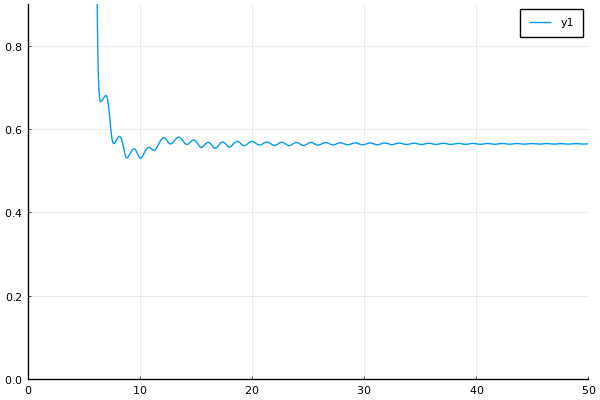

In [36]:
plot(
    sol.t,
    sol[1,:],
    xlim = (0.0, 50.0),
    ylim = (0.0, 0.9)
)

In [14]:
# parse saved_values for cell mass distributions + zeroth order moment
N_mt_list = zeros(length(sol.t),length(mc))
m0_list = []
for i in 1:length(sol.t)
    push!(m0_list,saved_values.saveval[i][2])
    N_mt_list[i,:] .= saved_values.saveval[i][1]
end

In [17]:
N_mt_list[begin:3:end,:]

497×500 Matrix{Float64}:
  4.59397e12    4.93409e12    5.29634e12   …   0.00142041    0.00114513
 -3.37439e-20  -3.37439e-20  -3.37439e-20      2.30613e9     1.66305e9
  2.17817e-21   2.17817e-21   2.17817e-21      5.18911e10    3.90186e10
 -1.4611e-22   -1.4611e-22   -1.4611e-22       5.20971e11    3.92184e11
  1.0526e-23    1.0526e-23    1.0526e-23       1.81261e12    1.3652e12
 -7.78382e-25  -7.78402e-25  -7.78393e-25  …   4.56412e12    3.44073e12
  5.65865e-26   5.66691e-26   5.66311e-26      9.45339e12    7.12477e12
 -3.64588e-27  -3.69881e-27  -3.67246e-27      1.77222e13    1.33557e13
  4.18847e-27   4.00283e-27   4.08772e-27      3.08686e13    2.32628e13
 -1.69829e-28  -1.32374e-28  -1.53827e-28      5.0212e13     3.78333e13
 -5.48381e-27  -5.12313e-27  -5.2917e-27   …   7.68678e13    5.79088e13
 -4.95473e-27  -4.59012e-27  -4.75433e-27      1.1393e14     8.58261e13
  2.7643e-28    2.14507e-28   2.51651e-28      1.6337e14     1.23042e14
  ⋮                                      

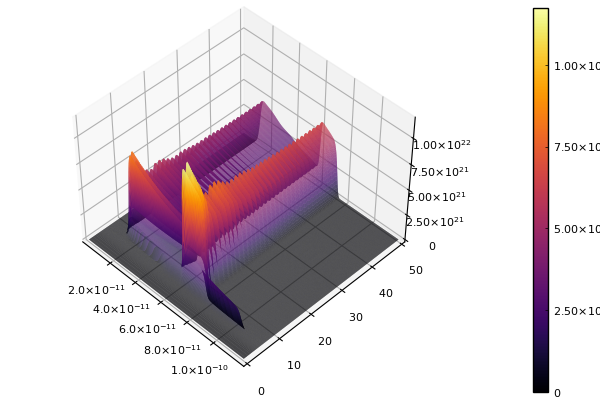

In [32]:
# summary plots
plot(
    mc,
    sol.t[begin:3:end],
    N_mt_list[begin:3:end,:],
    st=:surface,
    camera=(45,45)
)

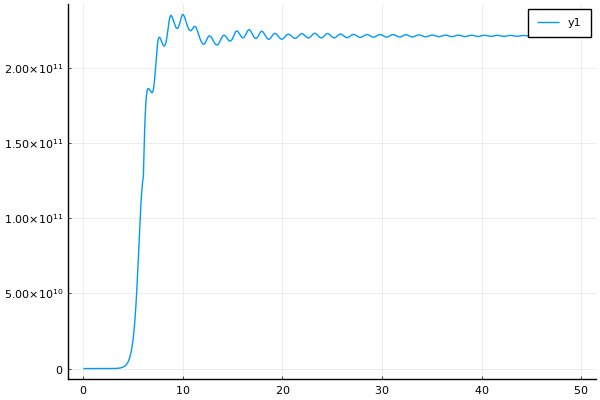

In [28]:
plot(
    sol.t,
    m0_list
)

# Provide a manual control change on dilution rate as given by Fig. 4 in paper

Need to refactor code to update dilution rate at each timestep using callbacks.

In [30]:
D_control(t,t1=20.0,t2=50.0,t3=100.0,t4=130.0) = 
    0.21*(t>=0.0 && t<t1) + 
    ((t-t1)*(0.18-0.21)/(t2-t1)+0.21)*(t>=t1 && t<t2) +
    0.18*(t>=t2 && t<t3) +
    ((t-t3)*(0.21-0.18)/(t4-t3)+0.18)*(t>=t3 && t<t4) +
    0.21*(t>=t4)

D_control (generic function with 5 methods)

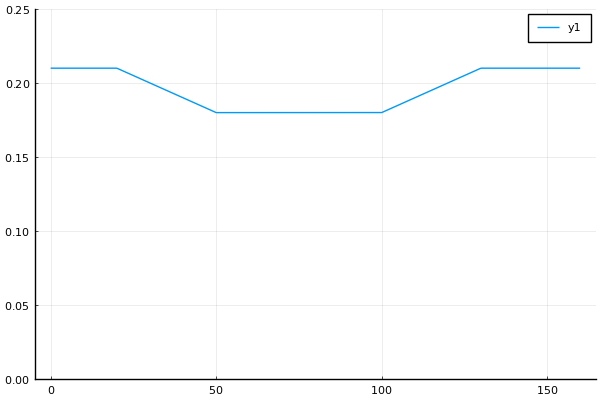

In [31]:
t_list = collect(range(0.0,160.0,500))
plot(
    t_list,
    D_control.(t_list),
    ylim = (0.0,0.25)
)

In [45]:
# helper functions
N_pdf(x::Union{AbstractFloat,AbstractArray}, mu::AbstractFloat, sigma::AbstractFloat) = @. 1/sigma/sqrt(2*pi) * exp( -(x - mu)^2 / 2 / sigma^2) # normal distribution for h(x) or h(m) depending on whether (x,mu_x,sigma_x) or (m,mu_m,sigma_m) are fed

# params
γ = 200.0                     # 1) 1/hr, maximum fission rate, when cell m ≥ m_d
A = sqrt(25/π)*1.0e11         # 2) 1/g, partition function exponential prefactors (i.e., p(m,m'))
S_l = 0.1                     # 3) g/L, low substrate limit
K_t = 0.01e-11                # 4) g/g/L, proportionality constant for change in transition mass with substrate levels
m_t0 = 6.0e-11                # 5) g, initial transition mass (at low substrate levels)
m_max = 12.0e-11              # 6) g, maximal cell mass allowed
Y = 0.4                       # 7) g/g, yield coefficient for cell mass to mols substrate
K_m = 25.0                    # 8) g/L, Monod constant for single cell growth rate
D = 0.25                      # 9) 1/h, dilution rate in continuous bioreactor operation
ϵ = 5.0e22                    # 10) g^{-2}, inverse variance for fission rate when cells are in fissioning state
β = 100.0e22                  # 11) g^{-2}, another inverse variance for partition function
S_h = 2.0                     # 12) g/L, high substrate limit
K_d = 2.0e-11                 # 13) g/g/L, proportionality constant for change in critical fissioning mass with substrate levels
m_d0 = 11.0e-11               # 14) g, initial critical fissioning mass (at low substrate levels)
m_a = 1.0e-11                 # 15) g, additional mass that mother cell must gain to start fissioning
μ_m = 5.0e-10                 # 16) g/h, single cell growth rate in limit of high substrate levels
α = 20.0                      # 17) 1/h, rate constant for delayed adjustment of cell metabolism to substrate levels
S_f = 25.0                    # 18) g/L, feed concentration of substrate to continuous bioreactor
N_m = 300                     # 19) -, number of grid points in mass domain

# IC conditions
μ_0 = 3.0e-11                 # g, initial cell mass distribution mean
σ_0 = 1.0e-11                 # g, initial cell mass distribution standard deviation
N_00 = 1.0e4                  # -, initial total number of cells
m_edges = collect(range(0.0,m_max,N_m+1))
mc = ((m_edges[2] - m_edges[1]) / 2.0) .+ m_edges[1:end-1]
N_IC = N_00 .* N_pdf(mc,μ_0,σ_0)
m0 = py"midpt_trapz"((mc[2] - mc[1]) .* ones(length(mc)), N_IC)

p_test = [
    γ,
    A,
    S_l,
    K_t,
    m_t0,
    m_max,
    Y,
    K_m,
    D,
    ϵ,
    β,
    S_h,
    K_d,
    m_d0,
    m_a,
    μ_m,
    α,
    S_f,
    N_m,
    N_IC,
    m0
]

# numerical parameters and ICs
t0 = 0.0                      # fig 4 initial time [h]
tf = 160.0                    # fig 4 final time [h]
tspan = (t0,tf)
u_0 = [
    0.6,                      # fig 4 initial substrate concentration [g/L]
    0.6                       # fig 4 initial filtered substrate concentration [g/L]
]

# set-up problem and callbacks
function affect_and_control!(integrator)
    # modify dilution rate per explicit control trajectory (open-loop control)
    integrator.p[9] = D_control(integrator.t)
    N_mt_res, m0_res = py"step_yeast_PBM"(
        integrator.u[2],       # S′
        integrator.p[1:end-2], # p_PBE
        integrator.p[end-1],   # N_mt from previous timestamp
        integrator.dt          # dt for stepping PBM
    )
    integrator.p[end-1] = N_mt_res
    integrator.p[end] = m0_res
end
condition(u,t,integrator) = true # callback at every time point
cb_stepPBM_changeD = DiscreteCallback(condition,affect_and_control!;save_positions=(false,false))
# saving callback info here: https://docs.sciml.ai/DiffEqCallbacks/stable/output_saving/#DiffEqCallbacks.SavingCallback
saved_values = SavedValues(Float64, Tuple{Vector{Float64},Float64})
cb_savingPBM = SavingCallback((u,t,integrator)->(integrator.p[end-1],integrator.p[end]), saved_values)
cbs = CallbackSet(cb_stepPBM_changeD,cb_savingPBM)

# need to implement functions to recover parameters from Lux structures
prob_openloop = ODEProblem(
    substrateODEs!,
    u_0,
    tspan,
    p_test,
    callback=cbs,
    tstops = [20.0,50.0,100.0,130.0]
)
sol_openloop = solve(
    prob_openloop, 
    Rodas5(autodiff = false),
    reltol = 1e-8,
    abstol = 1e-8
)

retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 4486-element Vector{Float64}:
   0.0
   0.0045045171921612465
   0.0075340610701141245
   0.012046363539262719
   0.016558666008411313
   0.021642096318208296
   0.02695145896593353
   0.03263378527237223
   0.03858308630042946
   0.04483239019957404
   0.05134939413479386
   0.0581418843365665
   0.0652027849098009
   ⋮
 159.53336312216763
 159.57596648553823
 159.61856984890883
 159.66117321227944
 159.70377657565004
 159.74637993902064
 159.78898330239124
 159.83158666576185
 159.87419002913245
 159.91679339250305
 159.95939675587366
 160.0
u: 4486-element Vector{Vector{Float64}}:
 [0.6, 0.6]
 [0.6274620877204221, 0.6012009300020296]
 [0.6429630667496468, 0.6032051844846779]
 [0.6660324603634418, 0.6076465353640216]
 [0.6890800041442835, 0.6136944111376466]
 [0.7150185573782605, 0.6222572411011886]
 [0.742080398849263, 0.6329898940029539]
 [0.7710098301627397, 0.646292746187232]
 [0.8012614

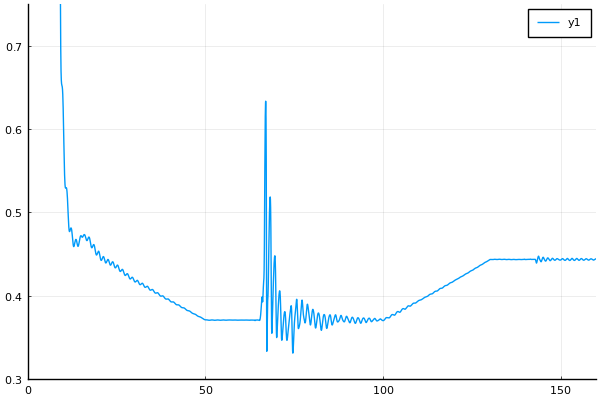

In [46]:
plot(
    sol_openloop.t,
    sol_openloop[1,:],
    xlim = (0.0, 160.0),
    ylim = (0.30, 0.75)
)

In [48]:
# parse saved_values for cell mass distributions + zeroth order moment
N_mt_list_controlled = zeros(length(sol_openloop.t),length(mc))
m0_list_controlled = []
for i in 1:length(sol_openloop.t)
    push!(m0_list_controlled,saved_values.saveval[i][2])
    N_mt_list_controlled[i,:] .= saved_values.saveval[i][1]
end

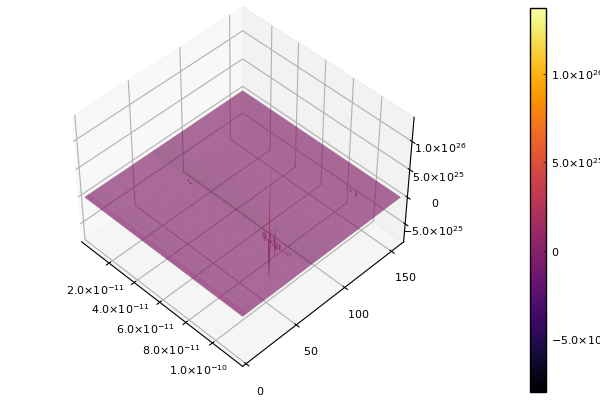

In [49]:
# summary plots
plot(
    mc,
    sol_openloop.t[begin:3:end],
    N_mt_list_controlled[begin:3:end,:],
    st=:surface,
    camera=(45,45)
)

In [ ]:
plot()

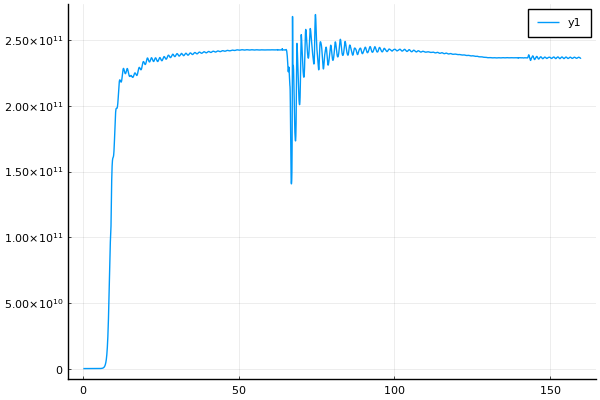

In [51]:
plot(
    sol_openloop.t,
    m0_list_controlled
)